<a href="https://colab.research.google.com/github/MarianoVizzo/4.Fintech-text-processing/blob/main/TP_Procesamiento_de_textos_Mariano_Vizzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

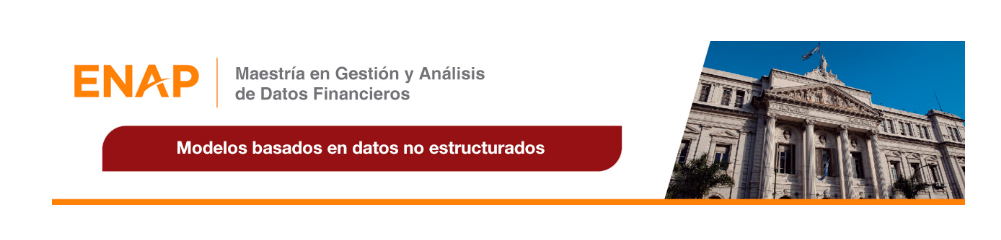

#          

# <center> **MAESTR√çA EN GESTI√ìN Y AN√ÅLISIS DE DATOS FINANCIEROS** </center>

# <center> **M71V. 09 - MODELOS BASADOS EN DATOS NO ESTRUCTURADOS** </center>

# <center> **TRABAJO FINAL** </center>

# <center> **PROCESAMIENTO DE DATOS DE TEXTO** </center>


**DOCENTE:**

- GARCIA FRONTI, JAVIER IGNACIO

**ESTUDIANTE:**

-	VIZZO, MARIANO

# **1. INTRODUCCI√ìN**

## **1.1. T√≠tulo del trabajo pr√°ctico**

**"Uso de K-Means, BERT y modelos predictivos para clasificar documentos relevantes para obtener un marco te√≥rico en un Trabajo Final de Maestr√≠a que refiere a la predicci√≥n de decisiones de inversi√≥n de los usuarios de una wallet (perteneciente a una Fintech Argentina)"**

## **1.2. Definici√≥n del problema**

Muchos investigadores enfrentan el desaf√≠o de que sus conjuntos de datos contienen art√≠culos que no son relevantes para su pregunta de investigaci√≥n. Por ejemplo, si el objetivo es encontrar documentos relacionados con la predicci√≥n de decisiones de inversi√≥n de los usuarios de una wallet de Fintech, los investigadores deben lidiar con t√©rminos de b√∫squeda ambiguos.

Las palabras "fintech", "inversi√≥n", "educaci√≥n financiera", "inclusi√≥n financiera" o "aprendizaje autom√°tico" conducen a muchos art√≠culos relevantes para la investigaci√≥n, pero tambi√©n a art√≠culos que no lo son (por ejemplo, art√≠culos sobre educaci√≥n financiera de estudiantes universitarios, aprendizaje de los estudiantes, etc.). Al utilizar t√©cnicas avanzadas de procesamiento de lenguaje natural (NLP) y m√©todos de clasificaci√≥n, este enfoque permite excluir estos art√≠culos sin tener que combinar t√©rminos de b√∫squeda espec√≠ficos. Adem√°s, el mismo c√≥digo tambi√©n se puede utilizar para eliminar o preferir ciertos g√©neros, como publicidad, noticias deportivas, etc.

Para abordar este problema, se utilizar√°n dos etapas principales:

- **Agrupaci√≥n de documentos utilizando K-Means.**

- **Clasificaci√≥n de relevancia utilizando BERT en conjunto de datos de texto con diferentes modelos predictivos de clasificaci√≥n.**

Adicionalmente, se aplicar√° un **Modelamiento de T√≥picos utilizando LDA.**

## **1.3. Objetivos**

- El objetivo general del trabajo pr√°ctico es aplicar t√©cnicas avanzadas de procesamiento de lenguaje natural (NLP) y m√©todos de clasificaci√≥n para identificar y clasificar documentos acad√©micos y de investigaci√≥n que sean relevantes para obtener un marco te√≥rico en un Trabajo Final de Maestr√≠a que refiere a la predicci√≥n de decisiones de inversi√≥n de los usuarios de una wallet de una Fintech.

- En aquellos casos que el documento acad√©mico o de investigaci√≥n seleccionado se relacione o contribuya a mejorar el marco te√≥rico de mi Trabajo Final de Maestr√≠a, ser√° clasificado como **"Relevante"**, en caso contrario, ser√° clasificado como **"Irrelevante".**

# **2. DESCRIPCI√ìN DEL CORPUS DE DOCUMENTOS EN PDFs**

Se instalan e importan las librer√≠as necesarias para realizar el preprocesamiento de los textos.

In [1]:
# Instalar librer√≠as

!pip install pdfminer.six

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.6/5.6 MB 62.1 MB/s eta 0:00:00


In [ ]:
from pdfminer.high_level import extract_text
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Conexi√≥n con drive
from google.colab import drive
drive.mount('/content/drive')

## **2.1. Recopilaci√≥n de datos**

Para analizar las tendencias tecnol√≥gicas en Fintech, se realiz√≥ una b√∫squeda exhaustiva de informes y documentos en formato PDF en varias fuentes confiables:

- **Google Scholar:** Plataforma esencial para literatura acad√©mica, incluyendo art√≠culos de revistas y tesis.

- **ResearchGate:** Red social para cient√≠ficos que comparten y colaboran en investigaciones.

- **ScienceDirect:** Base de datos l√≠der en investigaci√≥n cient√≠fica con acceso a art√≠culos de revistas y cap√≠tulos de libros.

- **Deloitte Insights:** Proporciona investigaciones sobre innovaci√≥n tecnol√≥gica en diversos sectores, incluyendo Fintech.

- **PwC Publications:** Informes y estudios de PwC sobre tecnolog√≠a y servicios financieros.

- **KPMG Insights:** Publicaciones de KPMG sobre la evoluci√≥n de la tecnolog√≠a financiera.

- **Banco Mundial:** Informes sobre el impacto de la tecnolog√≠a financiera en econom√≠as emergentes.

- **Fondo Monetario Internacional (FMI):** An√°lisis sobre c√≥mo las tecnolog√≠as financieras transforman los sistemas financieros globales.

**Metodolog√≠a**

- **Identificaci√≥n de Palabras Clave:** "inclusi√≥n financiera", "fintech y big data", "aprendizaje autom√°tico", "machine learning", "educaci√≥n financiera", etc.

- **B√∫squeda y Descarga:** Realizaci√≥n de b√∫squedas en las plataformas mencionadas y descarga de documentos pertinentes.

- **Filtrado y Selecci√≥n:** Revisi√≥n de los documentos para asegurar su relevancia y calidad, sin embargo, se consideraron documentos no relevantes para el an√°lisis.

### **2.1.1. Importaci√≥n y lectura de los PDFs**

Importaci√≥n y lectura de los PDFs.



In [ ]:
# Funci√≥n para leer el contenido de un PDF
def read_pdf(file_path):
    return extract_text(file_path)

# Directorios donde est√°n almacenados los PDFs en Google Drive para cada corpus
directorios_corpus = [
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_1',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_2',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_3',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_4',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_5',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_6'
]

# Diccionario para almacenar los textos de los PDFs de cada corpus
pdf_texts = {}

# Leer y almacenar el contenido de los PDFs de cada corpus
for directorio in directorios_corpus:
    corpus_name = os.path.basename(directorio)
    pdf_texts[corpus_name] = {}
    for filename in os.listdir(directorio):
        if filename.endswith('.pdf'):
            file_path = os.path.join(directorio, filename)
            pdf_texts[corpus_name][filename] = read_pdf(file_path)

In [ ]:
# Imprimir el texto extra√≠do del primer PDF
first_pdf = list(pdf_texts.keys())[0]
print(pdf_texts[first_pdf])

Convertir los Textos en DataFrames Separados

In [ ]:
# Diccionario para almacenar los DataFrames de cada corpus
dataframes_corpus = {}

# Convertir los textos de cada corpus en un DataFrame separado
for corpus_name, textos in pdf_texts.items():
    data = {'filename': list(textos.keys()), 'text': list(textos.values())}
    dataframes_corpus[corpus_name] = pd.DataFrame(data)

# Acceder a los DataFrames de cada corpus por separado
df_1 = dataframes_corpus['Corpus_1']
df_2 = dataframes_corpus['Corpus_2']
df_3 = dataframes_corpus['Corpus_3']
df_4 = dataframes_corpus['Corpus_4']
df_5 = dataframes_corpus['Corpus_5']
df_6 = dataframes_corpus['Corpus_6']

# Ejemplo: Imprimir los primeros registros de df_1
print(df_1.head())

                                            filename  \
0  De lo tradicional a lo digital, los fintech ll...   
1  El impacto de las Fintech en la TransformacioÃÅ...   
2  fintech_-estrategias-para-irrumpir-en-el-merca...   
3  El rol de las Fintech en una nueva etapa de la...   
4               Plataformas de preÃÅstamos online.pdf   

                                                text  
0  Ensayo\n\nDE LO TRADICIONAL A LO DIGITAL, \nLO...  
1  FACULTAD DE CIENCIAS ECONOMICAS \n\nEl Impacto...  
2  Jornadas Nacionales de Administraci√≥n Financie...  
3  Universidad Torcuato Di Tella ‚Äì Escuela de Neg...  
4  TESIS\n\nMICROPR√âSTAMOS EN EL MERCADO\nFINTECH...  


Agrupar los Dataframe en uno solo

In [ ]:
# Lista de DataFrames a unir
dataframes = [df_1, df_2, df_3, df_4, df_5, df_6]

# Unir todos los DataFrames en un solo DataFrame
df_original = pd.concat(dataframes, ignore_index=True)

# Imprimir los primeros registros del DataFrame unificado
df_original

filename  \
0   De lo tradicional a lo digital, los fintech ll...   
1   El impacto de las Fintech en la TransformacioÃÅ...   
2   fintech_-estrategias-para-irrumpir-en-el-merca...   
3   El rol de las Fintech en una nueva etapa de la...   
4                Plataformas de preÃÅstamos online.pdf   
..                                                ...   
64  Estrategias de aprendizaje y rendimiento acade...   
65  EL CUESTIONARIO CEVEAPEU. UN INSTRUMENTO PARA ...   
66  ESTRATEGIAS DE APRENDIZAJE Y RENDIMIENTO ACADE...   
67  La participacioÃÅn de la familia y su vinculaci...   
68  Las consecuencias sociales de las dificultades...   

                                                 text  
0   Ensayo\n\nDE LO TRADICIONAL A LO DIGITAL, \nLO...  
1   FACULTAD DE CIENCIAS ECONOMICAS \n\nEl Impacto...  
2   Jornadas Nacionales de Administraci√≥n Financie...  
3   Universidad Torcuato Di Tella ‚Äì Escuela de Neg...  
4   TESIS\n\nMICROPR√âSTAMOS EN EL MERCADO\nFINTECH...  
..                                                ...  
64  International Journal of Psychology and\n\nPsy...  
65  RELIEVE. Revista Electr√≥nica de Investigaci√≥n\...  
66  Revista de Investigaci√≥n Educativa\n\nISSN: 02...  
67  Divers.: Perspect. Psicol.  /  ISSN: 1794-9998...  
68  Ehquidad: La Revista Internacional de\n\nPol√≠t...  

[69 rows x 2 columns]

In [ ]:
# Guardar el DataFrame original con un car√°cter de escape
df_original.to_csv('corpus_original.csv', index=False, escapechar='\\')

In [ ]:
# Cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/corpus_original.csv')
df

filename  \
0   De lo tradicional a lo digital, los fintech ll...   
1   El impacto de las Fintech en la TransformacioÃÅ...   
2   fintech_-estrategias-para-irrumpir-en-el-merca...   
3   El rol de las Fintech en una nueva etapa de la...   
4                Plataformas de preÃÅstamos online.pdf   
..                                                ...   
64  Estrategias de aprendizaje y rendimiento acade...   
65  EL CUESTIONARIO CEVEAPEU. UN INSTRUMENTO PARA ...   
66  ESTRATEGIAS DE APRENDIZAJE Y RENDIMIENTO ACADE...   
67  La participacioÃÅn de la familia y su vinculaci...   
68  Las consecuencias sociales de las dificultades...   

                                                 text  
0   Ensayo\n\nDE LO TRADICIONAL A LO DIGITAL, \nLO...  
1   FACULTAD DE CIENCIAS ECONOMICAS \n\nEl Impacto...  
2   Jornadas Nacionales de Administraci√≥n Financie...  
3   Universidad Torcuato Di Tella ‚Äì Escuela de Neg...  
4   TESIS\n\nMICROPR√âSTAMOS EN EL MERCADO\nFINTECH...  
..                                                ...  
64  International Journal of Psychology and\n\nPsy...  
65  RELIEVE. Revista Electr√≥nica de Investigaci√≥n\...  
66  Revista de Investigaci√≥n Educativa\n\nISSN: 02...  
67  Divers.: Perspect. Psicol.  /  ISSN: 1794-9998...  
68  Ehquidad: La Revista Internacional de\n\nPol√≠t...  

[69 rows x 2 columns]

### **2.1.2. Interfaz de usuario interactiva**

Se crea una interfaz simple utilizando **ipywidgets**. Esto permite revisar cada documento y asignar etiquetas de "relevante" o "irrelevante" de forma interactiva.

Para el presente trabajo se consideran:

- **Relevantes:** Aquellos documentos relacionados a la tem√°tica "Fintech", con el fin de obtener un marco te√≥rico en mi Trabajo Final de Maestr√≠a.

- **Irrelevantes:** Aquellos documentos que no est√°n relacionado a la tem√°tica mencionada anteriormente y, en general, son documentos que se relacionan con la educaci√≥n en el marco universitario (dado que al momento de realizar las b√∫squedas, el algoritmo de las diferentes fuentes de datos, relacionaron palabras claves con estos documentos irrelevantes para el an√°lisis en cuesti√≥n).

**¬øC√≥mo funciona?**

   **1. Cargar y mostrar documentos:** Se carga el DataFrame Original y se muestra el contenido del primer documento con su "T√≠tulo" y "Descripci√≥n" posterior. Esto le permite a la persona que utilice el c√≥digo, obtener un r√°pida visi√≥n resumida de los PDFs que conforman el corpus.

   **2. Interfaz de usuario:** Se utiliza ipywidgets para crear botones interactivos que permiten etiquetar cada documento como "relevante" o "irrelevante".

   **3. Actualizar etiquetas:** Al hacer clic en uno de los botones, el DataFrame se actualiza con la etiqueta correspondiente y se muestra el siguiente documento.

   **4. Guardar el trabajo:** Una vez que etiquetados todos los documentos, se guardar√° el DataFrame en un archivo CSV.

A continuaci√≥n, se procede a crear la interfaz interactiva para etiquetar los documentos y aplicar los pasos mencionados anteriormente:

In [ ]:
pip install ipywidgets

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
# A√±adir una columna para las etiquetas
df['label'] = ''

# A√±adir una columna para las etiquetas
if 'label' not in df.columns:
    df['label'] = ''

# √çndice del documento actual
index = 0

# Funci√≥n para mostrar el documento actual
def show_document(index):
    if index < len(df):
        clear_output(wait=True)
        display(widgets.HTML(f"<h2>{df.loc[index, 'filename']}</h2>"))
        display(widgets.HTML(f"<p>{df.loc[index, 'text'][:2000]}</p>"))  # Mostrar los primeros 2000 caracteres
        display(label_buttons)
    else:
        clear_output(wait=True)
        display(widgets.HTML("<h2>Todos los documentos est√°n etiquetados</h2>"))

# Funci√≥n para manejar el etiquetado
def label_document(label):
    global index
    df.at[index, 'label'] = label
    index += 1
    show_document(index)

# Botones para etiquetar
relevant_button = widgets.Button(description="Relevant")
irrelevant_button = widgets.Button(description="Irrelevant")

# Conectar los botones con las funciones de etiquetado
relevant_button.on_click(lambda b: label_document('relevant'))
irrelevant_button.on_click(lambda b: label_document('irrelevant'))

# Contenedor para los botones
label_buttons = widgets.HBox([relevant_button, irrelevant_button])

# Mostrar el primer documento y los botones
show_document(index)

HTML(value='<h2>Todos los documentos est√°n etiquetados</h2>')

In [ ]:
# Visualizar el dataframe con etiquetas
df

filename  \
0   De lo tradicional a lo digital, los fintech ll...   
1   El impacto de las Fintech en la TransformacioÃÅ...   
2   fintech_-estrategias-para-irrumpir-en-el-merca...   
3   El rol de las Fintech en una nueva etapa de la...   
4                Plataformas de preÃÅstamos online.pdf   
..                                                ...   
64  Estrategias de aprendizaje y rendimiento acade...   
65  EL CUESTIONARIO CEVEAPEU. UN INSTRUMENTO PARA ...   
66  ESTRATEGIAS DE APRENDIZAJE Y RENDIMIENTO ACADE...   
67  La participacioÃÅn de la familia y su vinculaci...   
68  Las consecuencias sociales de las dificultades...   

                                                 text       label  
0   Ensayo\n\nDE LO TRADICIONAL A LO DIGITAL, \nLO...    relevant  
1   FACULTAD DE CIENCIAS ECONOMICAS \n\nEl Impacto...    relevant  
2   Jornadas Nacionales de Administraci√≥n Financie...    relevant  
3   Universidad Torcuato Di Tella ‚Äì Escuela de Neg...    relevant  
4   TESIS\n\nMICROPR√âSTAMOS EN EL MERCADO\nFINTECH...    relevant  
..                                                ...         ...  
64  International Journal of Psychology and\n\nPsy...  irrelevant  
65  RELIEVE. Revista Electr√≥nica de Investigaci√≥n\...  irrelevant  
66  Revista de Investigaci√≥n Educativa\n\nISSN: 02...  irrelevant  
67  Divers.: Perspect. Psicol.  /  ISSN: 1794-9998...  irrelevant  
68  Ehquidad: La Revista Internacional de\n\nPol√≠t...  irrelevant  

[69 rows x 3 columns]

### **2.1.3. Guardar las etiquetas**

Despu√©s de etiquetar los documentos, se guarda el DataFrame actualizado con las etiquetas:

In [ ]:
# Guardar el DataFrame actualizado con las etiquetas
df.to_csv('papers_labeled.csv', index=False, escapechar='\\')

In [ ]:
# Cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/papers_labeled.csv')

## **2.2. An√°lisis exploratorio**

### **2.2.1. Frecuencia de documentos**



label
relevant      59
irrelevant    10
Name: count, dtype: int64


<ipython-input-30-2f9b92cff310>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df, palette='viridis')


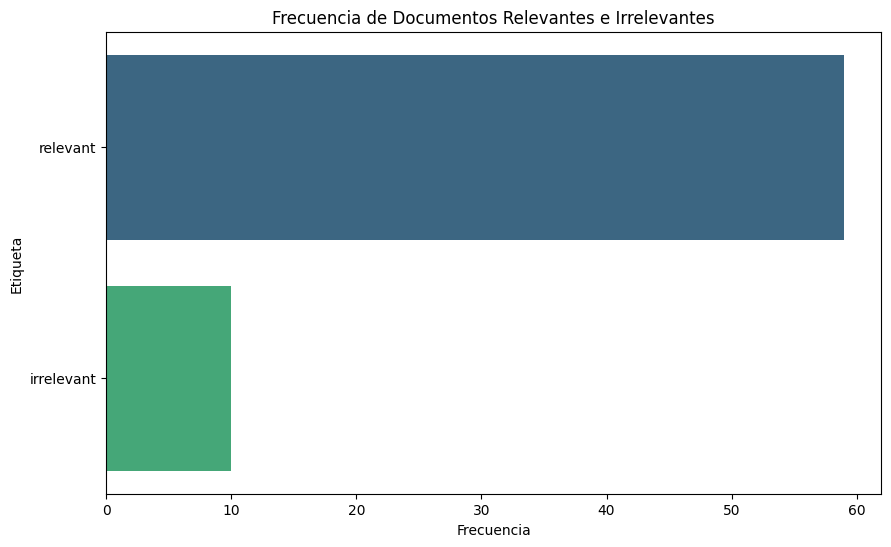

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las frecuencias de las etiquetas
label_counts = df['label'].value_counts()
print(label_counts)

# Visualizaci√≥n de la distribuci√≥n de etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df, palette='viridis')
plt.title('Frecuencia de Documentos Relevantes e Irrelevantes')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta')
plt.show()

**Interpretaci√≥n del gr√°fico:**

El conjunto de datos se encuentra significativamente desbalanceado, sin embargo, se procede a continuar con procesamiento de datos y su posterior an√°lisis.

Luego, en el apartado **"5.4. SMOTE: T√©cnica de balanceo de clases"**, se corrige el desbalanceo y se comparan los resultados de los diferentes modelos, verificando que existen mejoras en las predicciones al aplicar la t√©cnica mencionada.

### **2.2.2. Histograma de longitudes de textos**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-16-8085d8bd771c>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['length'], bins=10, kde=True, palette='viridis')


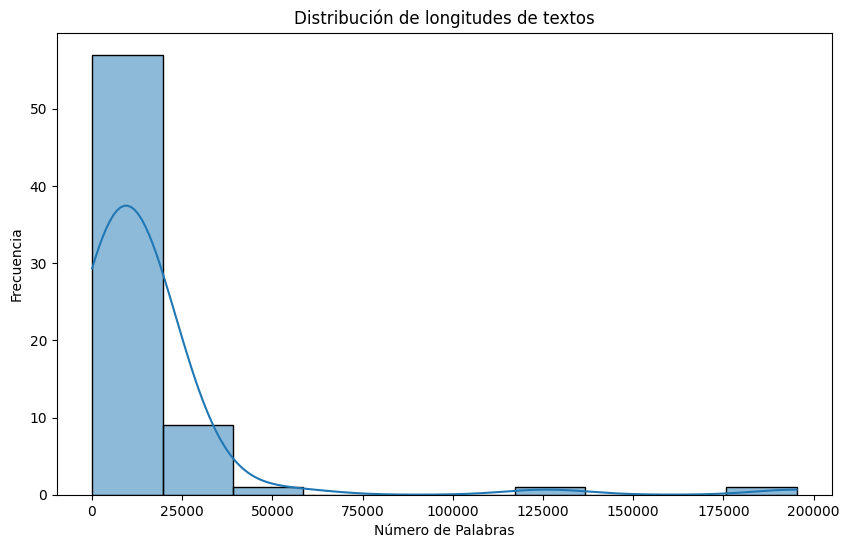

In [ ]:
# Calcular las longitudes de los textos
df['length'] = df['text'].apply(lambda x: len(x.split()))

# Gr√°fico de histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=10, kde=True, palette='viridis')
plt.title('Distribuci√≥n de longitudes de textos')
plt.xlabel('N√∫mero de Palabras')
plt.ylabel('Frecuencia')
plt.show()

**Interpretaci√≥n del gr√°fico:**

 - La mayor parte de los textos tienen un n√∫mero relativamente bajo de palabras. Esto se observa en la alta frecuencia de textos con una longitud de hasta 25.000 palabras.

- Hay pocos textos con una longitud extremadamente alta, como se ve en los valores m√°s altos en el eje X (hasta 200.000 palabras).

- **Razones para esta distribuci√≥n:**

   **1. Variedad en el tipo de Documentos:** Los documentos var√≠an ampliamente en longitud debido a la naturaleza de su contenido. Por ejemplo, algunos art√≠culos son cortos mientras que otros pueden ser reportes extensos o libros.

   **2. Datos an√≥malos:** Los textos extremadamente largos pueden ser datos an√≥malos o pueden representar documentos muy extensos como libros completos, tesis, o reportes detallados.

   **3. Difusi√≥n de contenidos:** La mayor√≠a de los documentos del corpus son art√≠culos de investigaci√≥n, papers acad√©micos, o reportes cortos.

### **2.2.3. Frecuencias de palabras (sin eliminar stopwords)**

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import string

<ipython-input-19-a70993b2584e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_no_clean), y=list(words_no_clean), palette='viridis')


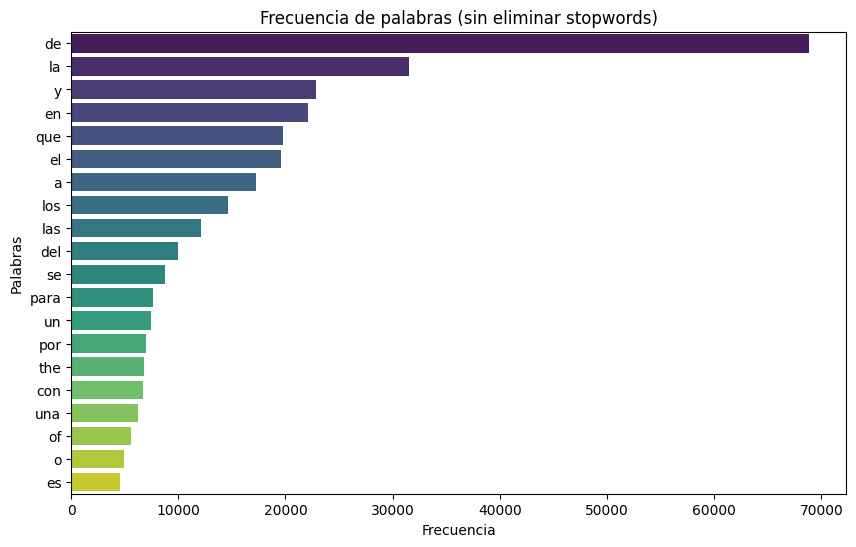

In [ ]:
# Preprocesamiento del texto sin eliminar stopwords
df['text_no_clean'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in string.punctuation]))

# Calcular la frecuencia de todas las palabras
all_words_no_clean = ' '.join(df['text_no_clean']).split()
word_freq_no_clean = Counter(all_words_no_clean)
common_words_no_clean = word_freq_no_clean.most_common(20)

# Preparar los datos para el gr√°fico
words_no_clean, counts_no_clean = zip(*common_words_no_clean)

# Gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts_no_clean), y=list(words_no_clean), palette='viridis')
plt.title('Frecuencia de palabras (sin eliminar stopwords)')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

**Interpretaci√≥n del Gr√°fico:**

El gr√°fico muestra la frecuencia de las palabras m√°s comunes del corpus de documentos sin eliminar las stopwords (palabras comunes que a menudo no aportan mucho significado, como "de", "la", "y", "en", "que", etc.). La mayor√≠a de las palabras m√°s frecuentes son stopwords, lo cual es esperable en un an√°lisis de texto no procesado.

In [ ]:
# Crear un DataFrame con las palabras m√°s comunes y sus frecuencias
common_words_df = pd.DataFrame(common_words_no_clean, columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla de las palabras m√°s frecuentes
print(common_words_df)

   Palabra  Frecuencia
0       de       68879
1       la       31547
2        y       22865
3       en       22113
4      que       19752
5       el       19628
6        a       17265
7      los       14656
8      las       12117
9      del        9951
10      se        8752
11    para        7628
12      un        7434
13     por        7000
14     the        6797
15     con        6680
16     una        6204
17      of        5573
18       o        4960
19      es        4565


# **3. CLUSTERING DE TEXTOS CON K-MEANS**

En este apartado se aplicar√°n simples pasos para lograr identificar tres grupos de documentos:

- Se preprocesa el texto para eliminar puntuaci√≥n y stopwords.

- Se vectoriza el texto usando TF-IDF.

- Se crea clusters usando K-Means.

- Se visualiza la cantidad de documentos por grupo y la distribuci√≥n de longitudes
de documentos por grupo.

- Se visualiza los clusters en un espacio bidimensional utilizando PCA.

## **3.1. Preprocesamiento de textos**

- Eliminar stopwords y puntuaci√≥n de los textos para obtener una representaci√≥n limpia y normalizada de los documentos.

- Aplicar t√©cnicas de lematizaci√≥n para reducir las palabras a su forma base y mejorar la consistencia de los datos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
# Lista predefinida de stopwords en espa√±ol
stop_words = set([
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para", "con", "no", "una",
    "su", "al", "lo", "como", "m√°s", "pero", "sus", "le", "ya", "o", "este", "s√≠", "porque", "esta", "entre",
    "cuando", "muy", "sin", "sobre", "tambi√©n", "me", "hasta", "hay", "donde", "quien", "desde", "todo", "nos",
    "durante", "todos", "uno", "les", "ni", "contra", "otros", "ese", "eso", "ante", "ellos", "e", "esto",
    "m√≠", "antes", "algunos", "qu√©", "unos", "yo", "otro", "otras", "otra", "√©l", "tanto", "esa", "estos",
    "mucho", "quienes", "nada", "muchos", "cual", "poco", "ella", "estar", "estas", "algunas", "algo",
    "nosotros", "mi", "mis", "t√∫", "te", "ti", "tu", "tus", "ellas", "nosotras", "vosotros", "vosotras",
    "os", "m√≠o", "m√≠a", "m√≠os", "m√≠as", "tuyo", "tuya", "tuyos", "tuyas", "suyo", "suya", "suyos", "suyas",
    "nuestro", "nuestra", "nuestros", "nuestras", "vuestro", "vuestra", "vuestros", "vuestras", "esos",
    "esas", "estoy", "est√°s", "est√°", "estamos", "est√°is", "est√°n", "est√©", "est√©s", "estemos", "est√©is",
    "est√©n", "estar√©", "estar√°s", "estar√°", "estaremos", "estar√©is", "estar√°n", "estar√≠a", "estar√≠as",
    "estar√≠amos", "estar√≠ais", "estar√≠an", "estaba", "estabas", "est√°bamos", "estabais", "estaban", "estuve",
    "estuviste", "estuvo", "estuvimos", "estuvisteis", "estuvieron", "estuviera", "estuvieras", "estuvi√©ramos",
    "estuvierais", "estuvieran", "estuviese", "estuvieses", "estuvi√©semos", "estuvieseis", "estuviesen",
    "estando", "estado", "estada", "estados", "estadas", "estad", "he", "has", "ha", "hemos", "hab√©is",
    "han", "haya", "hayas", "hayamos", "hay√°is", "hayan", "habr√©", "habr√°s", "habr√°", "habremos", "habr√©is",
    "habr√°n", "habr√≠a", "habr√≠as", "habr√≠amos", "habr√≠ais", "habr√≠an", "hab√≠a", "hab√≠as", "hab√≠amos",
    "hab√≠ais", "hab√≠an", "hube", "hubiste", "hubo", "hubimos", "hubisteis", "hubieron", "hubiera",
    "hubieras", "hubi√©ramos", "hubierais", "hubieran", "hubiese", "hubieses", "hubi√©semos", "hubieseis",
    "hubiesen", "habiendo", "habido", "habida", "habidos", "habidas", "soy", "eres", "es", "somos",
    "sois", "son", "sea", "seas", "seamos", "se√°is", "sean", "ser√©", "ser√°s", "ser√°", "seremos",
    "ser√©is", "ser√°n", "ser√≠a", "ser√≠as", "ser√≠amos", "ser√≠ais", "ser√≠an", "era", "eras", "√©ramos",
    "erais", "eran", "fui", "fuiste", "fue", "fuimos", "fuisteis", "fueron", "fuera", "fueras",
    "fu√©ramos", "fuerais", "fueran", "fuese", "fueses", "fu√©semos", "fueseis", "fuesen", "sintiendo",
    "sentido", "sentida", "sentidos", "sentidas", "siente", "sentid", "tengo", "tienes", "tiene",
    "tenemos", "ten√©is", "tienen", "tenga", "tengas", "tengamos", "teng√°is", "tengan", "tendr√©",
    "tendr√°s", "tendr√°", "tendremos", "tendr√©is", "tendr√°n", "tendr√≠a", "tendr√≠as", "tendr√≠amos",
    "tendr√≠ais", "tendr√≠an", "ten√≠a", "ten√≠as", "ten√≠amos", "ten√≠ais", "ten√≠an", "tuve", "tuviste",
    "tuvo", "tuvimos", "tuvisteis", "tuvieron", "tuviera", "tuvieras", "tuvi√©ramos", "tuvierais",
    "tuvieran", "tuviese", "tuvieses", "tuvi√©semos", "tuvieseis", "tuviesen", "teniendo", "tenido",
    "tenida", "tenidos", "tenidas", "tened"
])

# Preprocesamiento del texto
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['text_clean'] = df['text'].apply(preprocess_text)

# A√±adir columna de longitud de texto
df['length'] = df['text'].apply(lambda x: len(x.split()))

## **3.2. Vectorizaci√≥n de textos**

Convertir los textos preprocesados en vectores num√©ricos utilizando el m√©todo TF-IDF, facilitando as√≠ la aplicaci√≥n de algoritmos de clustering y clasificaci√≥n.

In [ ]:
# Vectorizaci√≥n del texto usando TF-IDF
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['text_clean'])

# Creaci√≥n de clusters usando KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **3.3. Gr√°fico de cantidad de documentos por grupo**

<ipython-input-43-3b59a97cfc62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='viridis')


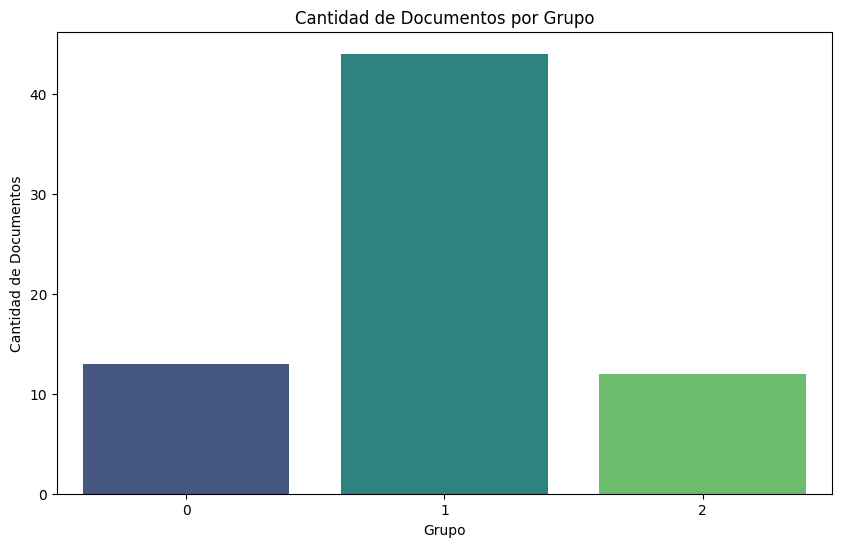

In [ ]:
# Visualizaci√≥n de la cantidad de documentos por grupo
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title('Cantidad de Documentos por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Documentos')
plt.show()

**Interpretaci√≥n del gr√°fico:**

- El grupo 1 tiene la mayor cantidad de documentos (44), seguido por el grupo 0 (13) y el grupo 2 (12).

- Esto sugiere una distribuci√≥n desigual de documentos entre los clusters, con el grupo 1 dominando en t√©rminos de cantidad.

In [ ]:
# Crear una tabla con la cantidad de documentos por grupos
cluster_counts = df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Grupo', 'Cantidad de Documentos']

# Mostrar la tabla
print(cluster_counts)

   Grupo  Cantidad de Documentos
0      1                      44
1      0                      13
2      2                      12


## **3.4. Gr√°fico de distribuci√≥n de longitudes de documentos por grupo**

<ipython-input-45-16ba99c74ee6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='length', data=df, palette='viridis')


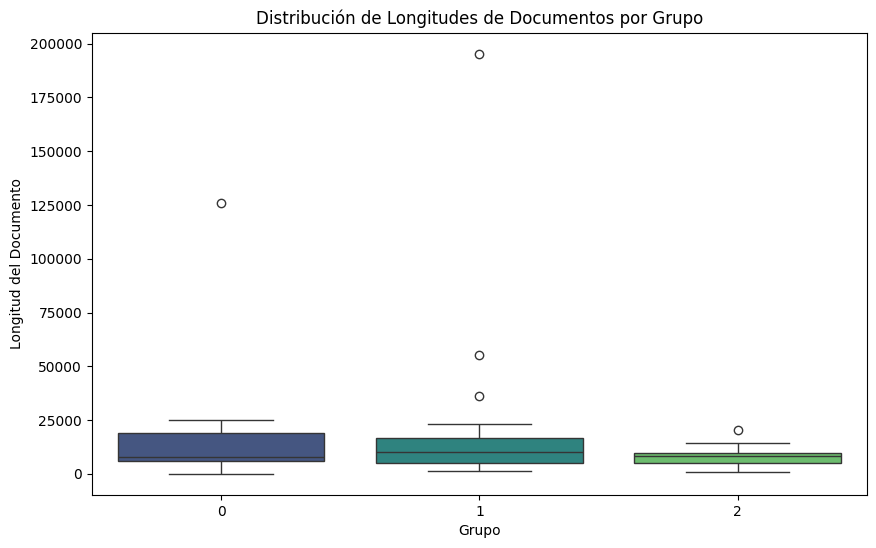

In [ ]:
# Visualizaci√≥n de las longitudes de los documentos por grupo
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='length', data=df, palette='viridis')
plt.title('Distribuci√≥n de Longitudes de Documentos por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Longitud del Documento')
plt.show()

**Interpretaci√≥n del gr√°fico:**

- El grupo 1 tiene una mayor variabilidad en las longitudes de los documentos y algunos outliers extremos, como se observa en los puntos fuera de la caja.

- Los grupos 0 y 2 tienen una longitud de documento m√°s consistente, con menos variabilidad.

- La longitud de los documentos puede estar influenciada por el contenido espec√≠fico de cada cluster, sugiriendo que los documentos largos en el grupo 1 podr√≠an tratar temas m√°s extensos o detallados.

## **3.5. Gr√°fico de visualizaci√≥n de clusters de documentos**

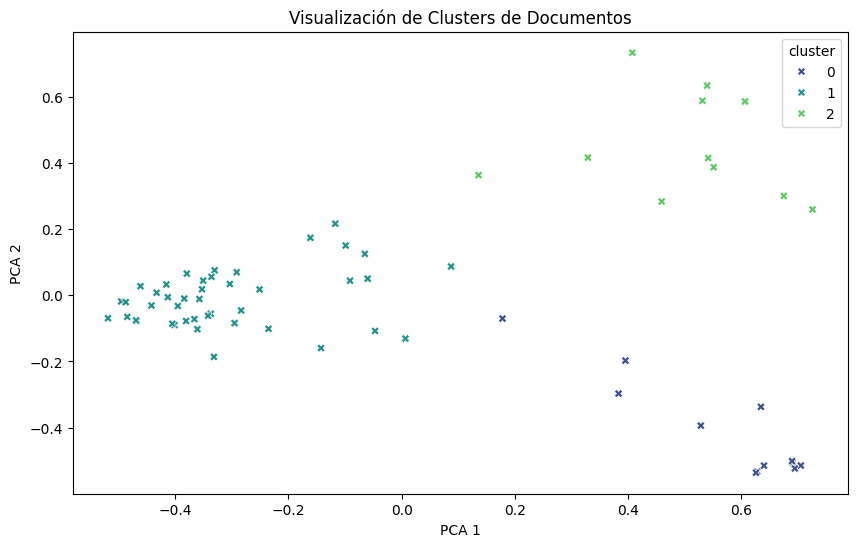

In [ ]:
# Reducci√≥n de dimensionalidad para visualizaci√≥n
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())
colors = sns.color_palette('viridis', n_colors=3)

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_axis, hue=df['cluster'], palette=colors, style=df['cluster'], markers=['X']*3)
plt.title('Visualizaci√≥n de Clusters de Documentos')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

**Interpretaci√≥n del gr√°fico:**

- Los documentos est√°n claramente separados en tres clusters distintos en el espacio 2D.

- Algunos clusters est√°n m√°s dispersos que otros, indicando que la variabilidad interna de los documentos en esos clusters es mayor.

- El grupo 1 (verde) est√° m√°s concentrado, lo que sugiere que los documentos en este cluster son m√°s similares entre s√≠.

- El grupo 0 (azul) y el grupo 2 (verde claro) est√°n m√°s dispersos, lo que sugiere mayor diversidad en el contenido de los documentos de estos clusters.

La **alta variabilidad en la longitud de los documentos** en ciertos clusters (especialmente el grupo 1) puede indicar la presencia de documentos de naturaleza diversa dentro de ese cluster.

Ante esta situaci√≥n, en el apartado **"6. TOPIC MODELING CON LDA"**, se realizar√° una subdivisi√≥n de estos clusters aplicando t√©cnicas adicionales de refinamiento, en las cuales se verifica mejoras en la cohesi√≥n interna.

# **4. IMPLEMENTACI√ìN DE BERT**

Ahora, se utiliza **BERT (Bidirectional Encoder Representations from Transformers)** para obtener representaciones de alta calidad de los documentos, capturando el contexto y el significado de las palabras en el texto.

## **4.1. Preprocesamiento de textos**

Se instalan las librer√≠as necesarias:

In [ ]:
pip install nltk

In [ ]:
pip install pandas

In [ ]:
pip install nltk pyspellchecker unidecode

In [ ]:
# Se instalan las librer√≠as necesarias
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import unidecode

In [ ]:
# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Cargar el DataFrame etiquetado
df = pd.read_csv('/content/drive/MyDrive/papers_labeled.csv')

In [ ]:
# Verificar si hay valores nulos en el DataFrame
print(df.isnull().sum())

filename    0
text        0
label       0
dtype: int64


In [ ]:
# Eliminar filas con valores nulos
df = df.dropna()

# Verificar nuevamente si hay valores nulos para asegurarse de que se han eliminado
print(df.isnull().sum())

filename    0
text        0
label       0
dtype: int64


In [ ]:
# Lista predefinida de stopwords en espa√±ol
stop_words = set(stopwords.words('spanish'))
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estar√°',
 'estar√°n',
 'estar√°s',
 'estar√©',
 'estar√©is',
 'estar√≠a',
 'estar√≠ais',
 'estar√≠amos',
 'estar√≠an',
 'estar√≠as',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuvi√©ramos',
 'estuvi√©semos',
 'estuvo',
 'est√°',
 'est√°bamos',
 'est√°is',
 'est√°n',
 'est√°s',
 'est√©',
 'est√©is',
 'est√©n',
 

In [ ]:
# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

In [ ]:
# Funci√≥n para limpiar el texto
def clean_text(text):
    # Eliminar caracteres especiales y d√≠gitos
    text = re.sub(r'[^a-zA-Z√°√©√≠√≥√∫√Å√â√ç√ì√ö√±√ë\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

# Funci√≥n para normalizar el texto
def normalize_text(text):
    # Convertir a min√∫sculas y quitar tildes
    text = text.lower()
    text = unidecode.unidecode(text)
    return text

# Funci√≥n para eliminar stopwords y tokenizar
def remove_stopwords_and_tokenize(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Funci√≥n para lematizar el texto
def lemmatize_text(words):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
# Aplicar las funciones de preprocesamiento
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_text'] = df['cleaned_text'].apply(normalize_text)
df['tokenized_text'] = df['cleaned_text'].apply(remove_stopwords_and_tokenize)
df['lemmatized_text'] = df['tokenized_text'].apply(lemmatize_text)

# Mostrar las primeras filas del DataFrame
df.head()

filename  \
0  De lo tradicional a lo digital, los fintech ll...   
1  El impacto de las Fintech en la TransformacioÃÅ...   
2  fintech_-estrategias-para-irrumpir-en-el-merca...   
3  El rol de las Fintech en una nueva etapa de la...   
4               Plataformas de preÃÅstamos online.pdf   

                                                text     label  \
0  Ensayo\n\nDE LO TRADICIONAL A LO DIGITAL, \nLO...  relevant   
1  FACULTAD DE CIENCIAS ECONOMICAS \n\nEl Impacto...  relevant   
2  Jornadas Nacionales de Administraci√≥n Financie...  relevant   
3  Universidad Torcuato Di Tella ‚Äì Escuela de Neg...  relevant   
4  TESIS\n\nMICROPR√âSTAMOS EN EL MERCADO\nFINTECH...  relevant   

                                        cleaned_text  \
0  ensayo\n\nde lo tradicional a lo digital \nlos...   
1  facultad de ciencias economicas \n\nel impacto...   
2  jornadas nacionales de administracion financie...   
3  universidad torcuato di tella  escuela de nego...   
4  tesis\n\nmicroprestamos en el mercado\nfintech...   

                                      tokenized_text  \
0  [ensayo, tradicional, digital, fintech, llegar...   
1  [facultad, ciencias, economicas, impacto, fint...   
2  [jornadas, nacionales, administracion, financi...   
3  [universidad, torcuato, di, tella, escuela, ne...   
4  [tesis, microprestamos, mercado, fintech, anal...   

                                     lemmatized_text  
0  ensayo tradicional digital fintech llegaron re...  
1  facultad ciencias economicas impacto fintech t...  
2  jornadas nacionales administracion financiera ...  
3  universidad torcuato di tella escuela negocios...  
4  tesis microprestamos mercado fintech analisis ...

In [ ]:
# Guardar el DataFrame preprocesado
df.to_csv('papers_preprocessed.csv', index=False)

In [ ]:
# Cargar el DataFrame
df = pd.read_csv('/content/papers_preprocessed.csv')

## **4.2. Gr√°fico de frecuencias de palabras**

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

[('the', 7915), ('of', 5609), ('and', 4549), ('fintech', 3823), ('in', 3243), ('ma', 3050), ('to', 3029), ('servicios', 2185), ('empresas', 2008), ('for', 1614), ('pago', 1610), ('is', 1593), ('financiera', 1469), ('informacion', 1466), ('si', 1437), ('n', 1402), ('ser', 1381), ('datos', 1314), ('argentina', 1247), ('that', 1208)]


<ipython-input-67-3cdf414684b9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


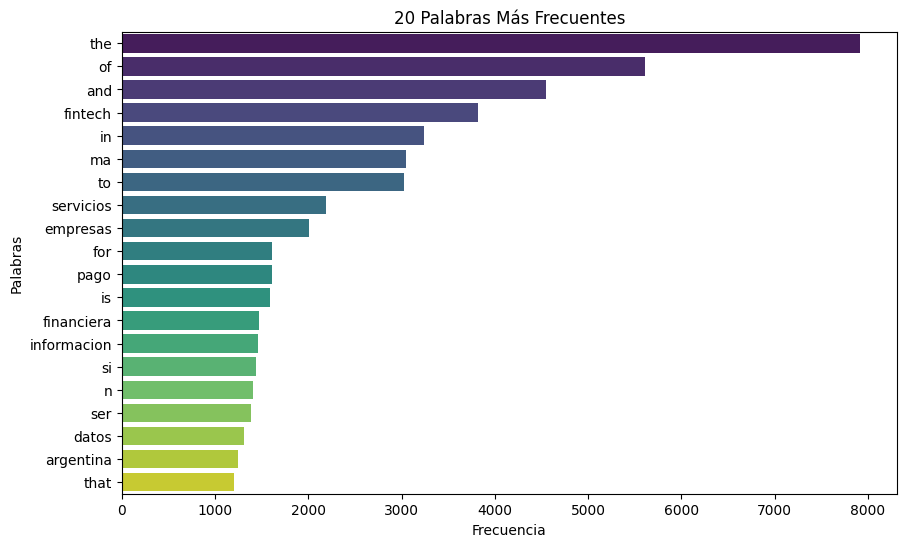

In [ ]:
# Unir todos los textos lematizados en una sola lista de palabras
all_words = ' '.join(df['lemmatized_text']).split()

# Contar la frecuencia de cada palabra
word_freq = Counter(all_words)

# Obtener las 20 palabras m√°s comunes
common_words = word_freq.most_common(20)
print(common_words)

# Visualizaci√≥n de las palabras m√°s comunes
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('20 Palabras M√°s Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

**Interpretaci√≥n del gr√°fico:**

- **Palabras Comunes en Ingl√©s:** Las palabras m√°s frecuentes como "the", "of", "and", "in", "to", "is", "for", "that" son stopwords comunes en ingl√©s.
Esto indica que algunas palabras comunes no se han eliminado durante el preprocesamiento, lo cual podr√≠a afectar la calidad del an√°lisis.

- **T√©rminos Relevantes para Fintech:** Palabras como "fintech", "servicios", "empresas", "pago", "financiera", "informacion", "datos", "argentina" son relevantes para el dominio de Fintech.


In [ ]:
# Crear un DataFrame con las palabras m√°s comunes y sus frecuencias
common_words_df = pd.DataFrame(common_words, columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla de las 20 palabras m√°s frecuentes
print(common_words_df)

        Palabra  Frecuencia
0           the        7915
1            of        5609
2           and        4549
3       fintech        3823
4            in        3243
5            ma        3050
6            to        3029
7     servicios        2185
8      empresas        2008
9           for        1614
10         pago        1610
11           is        1593
12   financiera        1469
13  informacion        1466
14           si        1437
15            n        1402
16          ser        1381
17        datos        1314
18    argentina        1247
19         that        1208


## **4.3. Gr√°fico de nubes de palabras**

### **4.3.1. Primera versi√≥n**

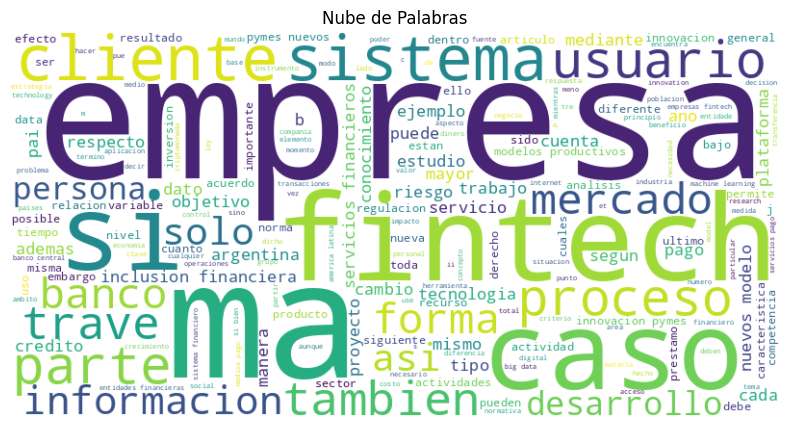

In [ ]:
from wordcloud import WordCloud

# Generar la nube de palabras
text = ' '.join(df['lemmatized_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

**Interpretaci√≥n de la Nube de Palabras:**



- La imagen de la nube de palabras muestra las palabras m√°s frecuentes en el texto lematizado de tus documentos. Las palabras m√°s grandes y centradas son las que aparecen con mayor frecuencia en el texto. En esta nube de palabras, podemos observar que t√©rminos como "ma", "si", "solo", "vez", "cada" y "ello" son muy comunes. Sin embargo, estas palabras no aportan mucho valor en t√©rminos de an√°lisis de contenido porque son palabras vac√≠as o stopwords (palabras muy comunes en el idioma que no aportan significado espec√≠fico).



**Mejoras que se aplicar√°n:**

- **Eliminar Stopwords:** Aunque ya ya se ha realizado un preprocesamiento para eliminar stopwords, parece que algunas palabras comunes no est√°n siendo filtradas.

- **Personalizar la lista de Stopwords:** Se agregar√°n palabras espec√≠ficas del dominio que no sean √∫tiles para el an√°lisis.

- **Lematizaci√≥n y stemming:** Se verifica que la lematizaci√≥n o stemming est√© funcionando correctamente para reducir las palabras a su forma base.

- **Ajustes en la visualizaci√≥n:** Ajustar par√°metros como el tama√±o m√°ximo de las palabras, los colores, y la forma de la nube para una mejor visualizaci√≥n.

### **4.3.2. Segunda versi√≥n**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Lista de stopwords adicionales
additional_stopwords = set(["que", "de", "la", "en", "el", "para", "por", "con", "lo", "una", "los", "del", "se", "las", "un", "su", "al", "es", "m√°s", "como", "si",
    'a', 'acuerdo', 'adelante', 'ademas', 'adem√°s', 'afirm√≥', 'agreg√≥', 'ahi', 'ahora', 'ah√≠', 'al', 'algo', 'alguna', 'algunas',
    'alguno', 'algunos', 'alg√∫n', 'alli', 'all√≠', 'alrededor', 'ambos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente',
    'aquel', 'aquella', 'aquellas', 'aquello', 'aquellos', 'aqui', 'aqu√©l', 'aqu√©lla', 'aqu√©llas', 'aqu√©llos', 'aqu√≠', 'arriba',
    'asegur√≥', 'asi', 'as√≠', 'atras', 'aun', 'aunque', 'a√±adi√≥', 'a√∫n', 'bajo', 'bastante', 'bien', 'breve', 'buen', 'buena', 'buenas',
    'bueno', 'buenos', 'cada', 'casi', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'claro', 'coment√≥', 'como', 'con', 'conmigo',
    'conocer', 'conseguimos', 'conseguir', 'considera', 'consider√≥', 'consigo', 'consigue', 'consiguen', 'consigues', 'contigo', 'contra',
    'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanta', 'cuantas', 'cuanto', 'cuantos', 'cuatro', 'cuenta', 'cu√°l', 'cu√°les',
    'cu√°ndo', 'cu√°nta', 'cu√°ntas', 'cu√°nto', 'cu√°ntos', 'c√≥mo', 'da', 'dado', 'dan', 'dar', 'de', 'debajo', 'debe', 'deben', 'debido',
    'decir', 'dej√≥', 'del', 'delante', 'demasiado', 'dem√°s', 'dentro', 'deprisa', 'desde', 'despacio', 'despues', 'despu√©s', 'detras',
    'detr√°s', 'dia', 'dias', 'dice', 'dicen', 'dicho', 'dieron', 'diez', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'doce',
    'donde', 'dos', 'durante', 'd√≠a', 'd√≠as', 'd√≥nde', 'e', 'el', 'ella', 'ellas', 'ello', 'ellos', 'embargo', 'en', 'encima', 'encuentra',
    'enfrente', 'enseguida', 'entonces', 'entre', 'era', 'eramos', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos',
    'esta', 'estaba', 'estaban', 'estado', 'estados', 'estais', 'estamos', 'estan', 'estar', 'estar√°', 'estas', 'este', 'esto', 'estos',
    'estoy', 'estuvo', 'est√°', 'est√°n', 'excepto', 'existe', 'existen', 'explic√≥', 'expres√≥', 'fin', 'final', 'fue', 'fuera', 'fueron',
    'fui', 'fuimos', 'gran', 'grande', 'grandes', 'ha', 'haber', 'habia', 'habla', 'hablan', 'habr√°', 'hab√≠a', 'hab√≠an', 'hace', 'haceis',
    'hacemos', 'hacen', 'hacer', 'hacerlo', 'haces', 'hacia', 'haciendo', 'hago', 'han', 'hasta', 'hay', 'haya', 'he', 'hecho', 'hemos',
    'hicieron', 'hizo', 'hoy', 'hubo', 'igual', 'incluso', 'indic√≥', 'informo', 'inform√≥', 'ir', 'junto', 'la', 'lado', 'largo', 'las',
    'le', 'les', 'lleg√≥', 'lleva', 'llevar', 'lo', 'los', 'luego', 'mal', 'manera', 'manifest√≥', 'mas', 'mayor', 'me', 'mediante', 'medio',
    'mejor', 'mencion√≥', 'menos', 'menudo', 'mi', 'mia', 'mias', 'mientras', 'mio', 'mios', 'mis', 'misma', 'mismas', 'mismo', 'mismos',
    'modo', 'mucha', 'muchas', 'mucho', 'muchos', 'muy', 'm√°s', 'm√≠', 'm√≠a', 'm√≠as', 'm√≠o', 'm√≠os', 'nada', 'nadie', 'ni', 'ninguna',
    'ningunas', 'ninguno', 'ningunos', 'ning√∫n', 'no', 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros',
    'nueva', 'nuevas', 'nueve', 'nuevo', 'nuevos', 'nunca', 'o', 'ocho', 'once', 'os', 'otra', 'otras', 'otro', 'otros', 'para', 'parece',
    'parte', 'partir', 'pasada', 'pasado', 'pa√¨s', 'peor', 'pero', 'pesar', 'poca', 'pocas', 'poco', 'pocos', 'podeis', 'podemos', 'poder',
    'podria', 'podriais', 'podriamos', 'podrian', 'podrias', 'podr√°', 'podr√°n', 'podr√≠a', 'podr√≠an', 'poner', 'por', 'porque', 'posible',
    'primer', 'primera', 'primero', 'primeros', 'pronto', 'propia', 'propias', 'propio', 'propios', 'proximo', 'pr√≥ximo', 'pr√≥ximos',
    'pudo', 'pueda', 'puede', 'pueden', 'puedo', 'pues', 'qeu', 'que', 'qued√≥', 'queremos', 'quien', 'quienes', 'quiere', 'quiza', 'quizas',
    'quiz√°', 'quiz√°s', 'qui√©n', 'qui√©nes', 'qu√©', 'realizado', 'realizar', 'realiz√≥', 'repente', 'respecto', 'sabe', 'sabeis', 'sabemos',
    'saben', 'saber', 'sabes', 'salvo', 'se', 'sea', 'sean', 'segun', 'segunda', 'segundo', 'seg√∫n', 'seis', 'ser', 'sera', 'ser√°', 'ser√°n',
    'ser√≠a', 'se√±al√≥', 'si', 'sido', 'siempre', 'siendo', 'siete', 'sigue', 'siguiente', 'sin', 'sino', 'sobre', 'sois', 'sola', 'solamente',
    'solas', 'solo', 'solos', 'somos', 'son', 'soy', 'su', 'supuesto', 'sus', 'suya', 'suyas', 'suyo', 'suyos', 's√©', 's√≠', 's√≥lo', 'tal',
    'tambien', 'tambi√©n', 'tampoco', 'tan', 'tanto', 'tarde', 'te', 'temprano', 'tendr√°', 'tendr√°n', 'teneis', 'tenemos', 'tener', 'tenga',
    'tengo', 'tenido', 'ten√≠a', 'tercera', 'tercero', 'ti', 'tiene', 'tienen', 'toda', 'todas', 'todavia', 'todav√≠a', 'todo', 'todos',
    'total', 'tras', 'trata', 'trav√©s', 'tres', 'tu', 'tus', 'tuvo', 'tuya', 'tuyas', 'tuyo', 'tuyos', 't√∫', 'u', 'ultimo', 'un', 'una',
    'unas', 'uno', 'unos', 'usa', 'usais', 'usamos', 'usan', 'usar', 'usas', 'uso', 'usted', 'ustedes', 'va', 'vais', 'vamos', 'van',
    'varias', 'varios', 'vaya', 'veces', 'ver', 'verdad', 'verdadera', 'verdadero', 'vez', 'vosotras', 'vosotros', 'voy', 'vuestra',
    'vuestras', 'vuestro', 'vuestros', 'y', 'ya', 'yo', '√©l', 'www', 'estn','ao','trave','ma','j','pai','ano','caso'])



# Unir la lista de stopwords de NLTK con las adicionales
stopwords = STOPWORDS.union(additional_stopwords)

# Generar el texto completo a partir de la columna 'lemmatized_text'
text = ' '.join(df['lemmatized_text'])

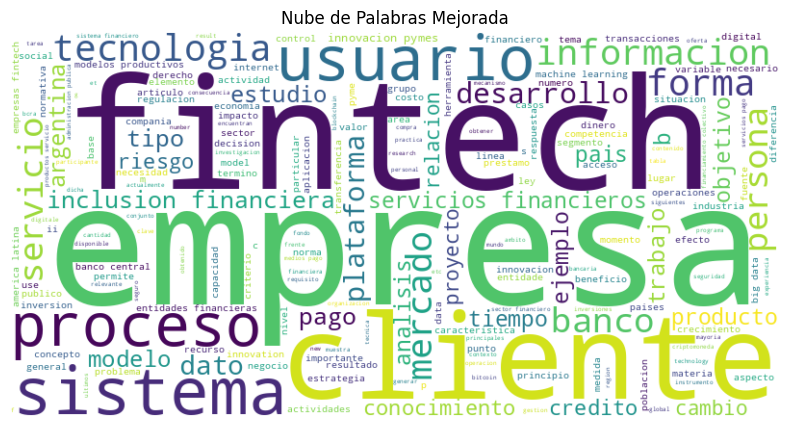

In [ ]:
# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, max_words=200, colormap='viridis').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Mejorada')
plt.show()

**Interpretaci√≥n de la Nube de Palabras:**

La imagen de la nube de palabras mejorada muestra que t√©rminos como "ma", "si", "solo", "vez", "cada" y "ello" fueron eliminados. Sin embargo se procede a realizar reajustes relacionado a los stopwords en ingl√©s.

Para realizar un an√°lisis de texto m√°s preciso y relevante en espa√±ol, es importante eliminar las palabras en ingl√©s y otros conectores que no sean de inter√©s. Estas palabras pueden introducir ruido en el an√°lisis y sesgar los resultados.

### **4.3.3. Tercera versi√≥n**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords as nltk_stopwords
import nltk
from collections import Counter
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


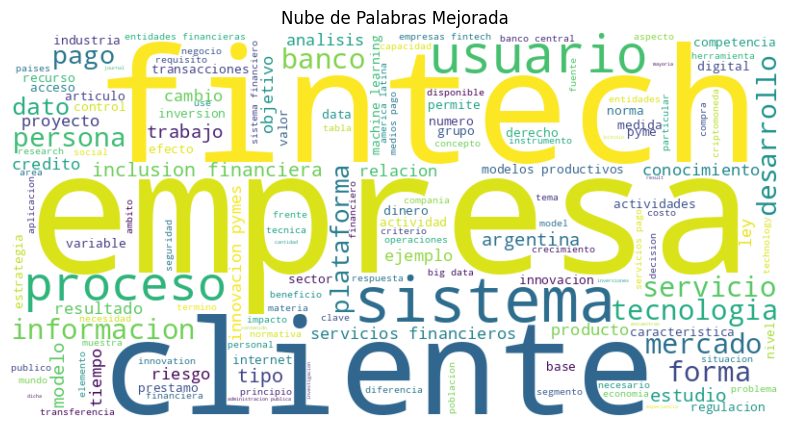

In [ ]:
# Descargar las stopwords en ingl√©s de NLTK
nltk.download('stopwords')

# Lista de stopwords adicionales en espa√±ol
additional_stopwords_es = set(["que", "de", "la", "en", "el", "para", "por", "con", "lo", "una", "los", "del", "se", "las", "un", "su", "al", "es", "m√°s", "como", "si",
    'a', 'acuerdo', 'adelante', 'ademas', 'adem√°s', 'afirm√≥', 'agreg√≥', 'ahi', 'ahora', 'ah√≠', 'al', 'algo', 'alguna', 'algunas',
    'alguno', 'algunos', 'alg√∫n', 'alli', 'all√≠', 'alrededor', 'ambos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente',
    'aquel', 'aquella', 'aquellas', 'aquello', 'aquellos', 'aqui', 'aqu√©l', 'aqu√©lla', 'aqu√©llas', 'aqu√©llos', 'aqu√≠', 'arriba',
    'asegur√≥', 'asi', 'as√≠', 'atras', 'aun', 'aunque', 'a√±adi√≥', 'a√∫n', 'bajo', 'bastante', 'bien', 'breve', 'buen', 'buena', 'buenas',
    'bueno', 'buenos', 'cada', 'casi', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'claro', 'coment√≥', 'como', 'con', 'conmigo',
    'conocer', 'conseguimos', 'conseguir', 'considera', 'consider√≥', 'consigo', 'consigue', 'consiguen', 'consigues', 'contigo', 'contra',
    'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanta', 'cuantas', 'cuanto', 'cuantos', 'cuatro', 'cuenta', 'cu√°l', 'cu√°les',
    'cu√°ndo', 'cu√°nta', 'cu√°ntas', 'cu√°nto', 'cu√°ntos', 'c√≥mo', 'da', 'dado', 'dan', 'dar', 'de', 'debajo', 'debe', 'deben', 'debido',
    'decir', 'dej√≥', 'del', 'delante', 'demasiado', 'dem√°s', 'dentro', 'deprisa', 'desde', 'despacio', 'despues', 'despu√©s', 'detras',
    'detr√°s', 'dia', 'dias', 'dice', 'dicen', 'dicho', 'dieron', 'diez', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'doce',
    'donde', 'dos', 'durante', 'd√≠a', 'd√≠as', 'd√≥nde', 'e', 'el', 'ella', 'ellas', 'ello', 'ellos', 'embargo', 'en', 'encima', 'encuentra',
    'enfrente', 'enseguida', 'entonces', 'entre', 'era', 'eramos', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos',
    'esta', 'estaba', 'estaban', 'estado', 'estados', 'estais', 'estamos', 'estan', 'estar', 'estar√°', 'estas', 'este', 'esto', 'estos',
    'estoy', 'estuvo', 'est√°', 'est√°n', 'excepto', 'existe', 'existen', 'explic√≥', 'expres√≥', 'fin', 'final', 'fue', 'fuera', 'fueron',
    'fui', 'fuimos', 'gran', 'grande', 'grandes', 'ha', 'haber', 'habia', 'habla', 'hablan', 'habr√°', 'hab√≠a', 'hab√≠an', 'hace', 'haceis',
    'hacemos', 'hacen', 'hacer', 'hacerlo', 'haces', 'hacia', 'haciendo', 'hago', 'han', 'hasta', 'hay', 'haya', 'he', 'hecho', 'hemos',
    'hicieron', 'hizo', 'hoy', 'hubo', 'igual', 'incluso', 'indic√≥', 'informo', 'inform√≥', 'ir', 'junto', 'la', 'lado', 'largo', 'las',
    'le', 'les', 'lleg√≥', 'lleva', 'llevar', 'lo', 'los', 'luego', 'mal', 'manera', 'manifest√≥', 'mas', 'mayor', 'me', 'mediante', 'medio',
    'mejor', 'mencion√≥', 'menos', 'menudo', 'mi', 'mia', 'mias', 'mientras', 'mio', 'mios', 'mis', 'misma', 'mismas', 'mismo', 'mismos',
    'modo', 'mucha', 'muchas', 'mucho', 'muchos', 'muy', 'm√°s', 'm√≠', 'm√≠a', 'm√≠as', 'm√≠o', 'm√≠os', 'nada', 'nadie', 'ni', 'ninguna',
    'ningunas', 'ninguno', 'ningunos', 'ning√∫n', 'no', 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros',
    'nueva', 'nuevas', 'nueve', 'nuevo', 'nuevos', 'nunca', 'o', 'ocho', 'once', 'os', 'otra', 'otras', 'otro', 'otros', 'para', 'parece',
    'parte', 'partir', 'pasada', 'pasado', 'pa√¨s', 'peor', 'pero', 'pesar', 'poca', 'pocas', 'poco', 'pocos', 'podeis', 'podemos', 'poder',
    'podria', 'podriais', 'podriamos', 'podrian', 'podrias', 'podr√°', 'podr√°n', 'podr√≠a', 'podr√≠an', 'poner', 'por', 'porque', 'posible',
    'primer', 'primera', 'primero', 'primeros', 'pronto', 'propia', 'propias', 'propio', 'propios', 'proximo', 'pr√≥ximo', 'pr√≥ximos',
    'pudo', 'pueda', 'puede', 'pueden', 'puedo', 'pues', 'qeu', 'que', 'qued√≥', 'queremos', 'quien', 'quienes', 'quiere', 'quiza', 'quizas',
    'quiz√°', 'quiz√°s', 'qui√©n', 'qui√©nes', 'qu√©', 'realizado', 'realizar', 'realiz√≥', 'repente', 'respecto', 'sabe', 'sabeis', 'sabemos',
    'saben', 'saber', 'sabes', 'salvo', 'se', 'sea', 'sean', 'segun', 'segunda', 'segundo', 'seg√∫n', 'seis', 'ser', 'sera', 'ser√°', 'ser√°n',
    'ser√≠a', 'se√±al√≥', 'si', 'sido', 'siempre', 'siendo', 'siete', 'sigue', 'siguiente', 'sin', 'sino', 'sobre', 'sois', 'sola', 'solamente',
    'solas', 'solo', 'solos', 'somos', 'son', 'soy', 'su', 'supuesto', 'sus', 'suya', 'suyas', 'suyo', 'suyos', 's√©', 's√≠', 's√≥lo', 'tal',
    'tambien', 'tambi√©n', 'tampoco', 'tan', 'tanto', 'tarde', 'te', 'temprano', 'tendr√°', 'tendr√°n', 'teneis', 'tenemos', 'tener', 'tenga',
    'tengo', 'tenido', 'ten√≠a', 'tercera', 'tercero', 'ti', 'tiene', 'tienen', 'toda', 'todas', 'todavia', 'todav√≠a', 'todo', 'todos',
    'total', 'tras', 'trata', 'trav√©s', 'tres', 'tu', 'tus', 'tuvo', 'tuya', 'tuyas', 'tuyo', 'tuyos', 't√∫', 'u', 'ultimo', 'un', 'una',
    'unas', 'uno', 'unos', 'usa', 'usais', 'usamos', 'usan', 'usar', 'usas', 'uso', 'usted', 'ustedes', 'va', 'vais', 'vamos', 'van',
    'varias', 'varios', 'vaya', 'veces', 'ver', 'verdad', 'verdadera', 'verdadero', 'vez', 'vosotras', 'vosotros', 'voy', 'vuestra',
    'vuestras', 'vuestro', 'vuestros', 'y', 'ya', 'yo', '√©l', 'www', 'estn','ao','trave','ma','j','pai','ano','n','h','et','p','ii','b', 'c','f','caso','g',
    'entidade', 'casos','lugar','momento','punto','pais','linea','general','importante','1','l','iii'])

# Lista de stopwords en ingl√©s
english_stopwords = set(nltk_stopwords.words('english'))

# Unir todas las stopwords
all_stopwords = STOPWORDS.union(additional_stopwords_es).union(english_stopwords)

# Generar el texto completo a partir de la columna 'lemmatized_text'
text = ' '.join(df['lemmatized_text'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=all_stopwords, max_words=150, colormap='viridis').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Mejorada')
plt.show()

**Interpretaci√≥n de la Nube de Palabras Mejorada:**

- **Palabras Dominantes:** **"fintech", "empresa", "cliente", "proceso", "sistema", "informacion", "usuario"** son algunas de las palabras m√°s destacadas en la nube.
Estas palabras indican los temas centrales del corpus de documentos relacionados con Fintech.

- **Temas Relevantes:**

  - **Empresas y Clientes:** Palabras como "empresa" y "cliente" sugieren que muchos documentos est√°n enfocados en la interacci√≥n entre las empresas y sus clientes en el contexto de Fintech.

  - **Procesos y Sistemas:** T√©rminos como "proceso", "sistema", "plataforma" y "servicio" indican que los documentos discuten bastante sobre los procesos operativos y los sistemas utilizados en la industria Fintech.

  - **Tecnolog√≠a y Desarrollo:** Palabras como "tecnologia", "desarrollo", "innovacion" resaltan la importancia de la innovaci√≥n tecnol√≥gica y el desarrollo continuo en Fintech.

  - **Finanzas y Mercado:** T√©rminos como "financiera", "mercado", "credito", "inversion" subrayan el aspecto financiero y el funcionamiento del mercado dentro del sector Fintech.

- **Inclusi√≥n Financiera y Regulaci√≥n:**

  - **"inclusion financiera":** La presencia de esta frase sugiere que la inclusi√≥n financiera es un tema significativo en el corpus.

  - **Regulaci√≥n y Normativas:** Palabras como "regulacion", "normativa", "ley" indican discusiones sobre el marco regulatorio que afecta a la industria Fintech.

- **Otros T√©rminos Relevantes:**

  - **"usuario", "proyecto", "riesgo", "pago", "servicio":** Estas palabras indican la diversidad de temas y aspectos tratados en los documentos, desde la gesti√≥n de riesgos hasta las soluciones de pago.

## **4.4. Vectorizaci√≥n de textos**

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizaci√≥n del texto usando TF-IDF
vectorizer = TfidfVectorizer(max_features=100000)  # Puedes ajustar max_features seg√∫n sea necesario
X = vectorizer.fit_transform(df['lemmatized_text'])

# Mostrar la forma de la matriz TF-IDF
print(X.shape)

(69, 45771)


In [ ]:
# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# A√±adir la columna de etiquetas al DataFrame
tfidf_df['label'] = df['label']

In [ ]:
# Guardar el DataFrame TF-IDF en un archivo CSV
tfidf_df.to_csv('papers_tfidf.csv', index=False)

## **4.5. Embeddings usando BERT**

In [ ]:
pip install transformers

In [ ]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
# Importar librer√≠as necesarias
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# Cargar el DataFrame etiquetado
df = pd.read_csv('/content/drive/MyDrive/papers_preprocessed.csv')

In [ ]:
# Inicializar el tokenizer y el modelo de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Funci√≥n para obtener los embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
    outputs = model(**inputs)
    # Obtener la √∫ltima capa oculta
    hidden_states = outputs.last_hidden_state
    # Promediar las representaciones de todos los tokens para obtener una √∫nica representaci√≥n del texto
    embeddings = torch.mean(hidden_states, dim=1)
    return embeddings.detach().numpy()

In [ ]:
# Obtener los embeddings para todos los textos
embeddings = []
for text in df['lemmatized_text']:
    embedding = get_bert_embeddings(text)
    embeddings.append(embedding[0])

# Convertir los embeddings a un DataFrame
embeddings_df = pd.DataFrame(embeddings)

# A√±adir la columna de etiquetas al DataFrame
embeddings_df['label'] = df['label']

# Mostrar las primeras filas del DataFrame de embeddings
print(embeddings_df.head())

          0         1         2         3         4         5         6  \
0 -0.377507  0.254545  0.347214  0.115172  0.793599 -0.027680 -0.008779   
1 -0.306559  0.200601  0.338521  0.130136  0.878497  0.062647 -0.068410   
2 -0.316999  0.285952  0.274176  0.110892  0.828631 -0.009029 -0.034839   
3 -0.521981  0.090146  0.376835  0.028643  0.689034  0.021100  0.004353   
4 -0.413088  0.165403  0.396988  0.085416  0.747207  0.083727 -0.074838   

          7         8         9  ...       759       760       761       762  \
0  0.675111 -0.244937 -0.061346  ... -0.249434  0.173957  0.016832  0.130146   
1  0.619504 -0.215139 -0.047725  ... -0.147152  0.234632  0.025854  0.146616   
2  0.563265 -0.177594 -0.014075  ... -0.117051  0.142661  0.052928  0.101717   
3  0.623495 -0.249917 -0.092385  ... -0.230512  0.225433 -0.053196  0.072034   
4  0.631626 -0.189689 -0.112082  ... -0.161228  0.128983  0.033007  0.159325   

        763       764       765       766       767     label  
0 -0

In [ ]:
# Cargar el DataFrame etiquetado
df = pd.read_csv('/content/drive/MyDrive/papers_preprocessed.csv')

# Inicializar el tokenizer y el modelo de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Funci√≥n para obtener los embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
    outputs = model(**inputs)
    # Obtener la √∫ltima capa oculta
    hidden_states = outputs.last_hidden_state
    # Promediar las representaciones de todos los tokens para obtener una √∫nica representaci√≥n del texto
    embeddings = torch.mean(hidden_states, dim=1)
    return embeddings.detach().numpy()

# Obtener los embeddings para todos los textos
embeddings = []
for text in df['lemmatized_text']:
    embedding = get_bert_embeddings(text)
    embeddings.append(embedding[0])

# Convertir los embeddings a un DataFrame
embeddings_df = pd.DataFrame(embeddings)

# A√±adir la columna de etiquetas al DataFrame
embeddings_df['label'] = df['label']

# Mostrar las primeras filas del DataFrame de embeddings
print(embeddings_df.head())

# Guardar el DataFrame de embeddings en un archivo CSV
embeddings_df.to_csv('papers_bert_embeddings.csv', index=False)

In [ ]:
# Guardar el DataFrame de embeddings en un archivo CSV
embeddings_df.to_csv('papers_bert_embeddings.csv', index=False)

In [ ]:
# Cargar el DataFrame preprocesado embeddings
embeddings_df = pd.read_csv('papers_bert_embeddings.csv')

# **5. ENTRENAMIENTO DE MODELOS PREDICTIVOS DE CLASIFICACI√ìN**

## **5.1. Definici√≥n de los modelos**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Asumiendo que el DataFrame tiene una columna 'label' para las etiquetas y el resto son embeddings
X = embeddings_df.drop(columns=['label'])
y = embeddings_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir los modelos
models = {
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=100000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

In [ ]:
# Funci√≥n para evaluar el modelo
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

## **5.2. Resultados de los modelos**

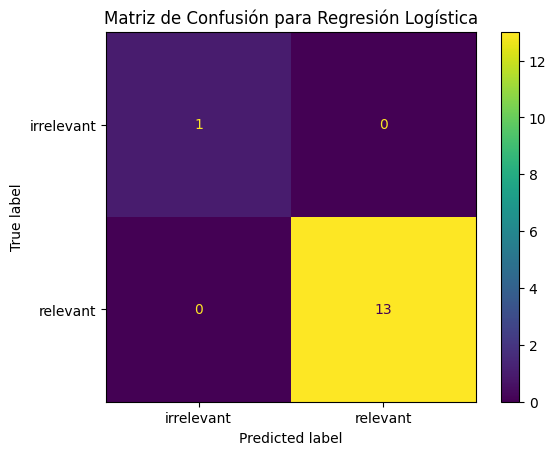

Reporte de Clasificaci√≥n de Regresi√≥n Log√≠stica:
              precision    recall  f1-score   support

 Irrelevante       1.00      1.00      1.00         1
   Relevante       1.00      1.00      1.00        13

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



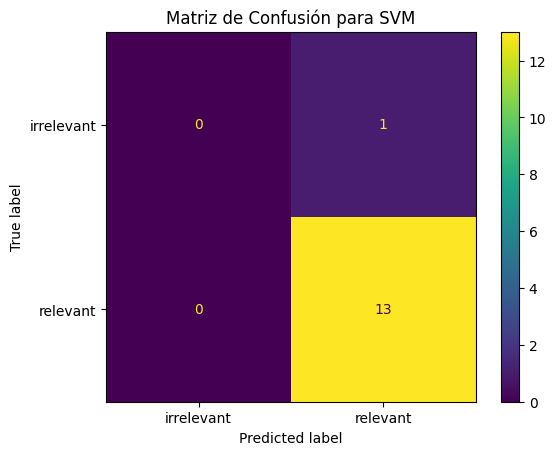

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reporte de Clasificaci√≥n de SVM:
              precision    recall  f1-score   support

 Irrelevante       0.00      0.00      0.00         1
   Relevante       0.93      1.00      0.96        13

    accuracy                           0.93        14
   macro avg       0.46      0.50      0.48        14
weighted avg       0.86      0.93      0.89        14



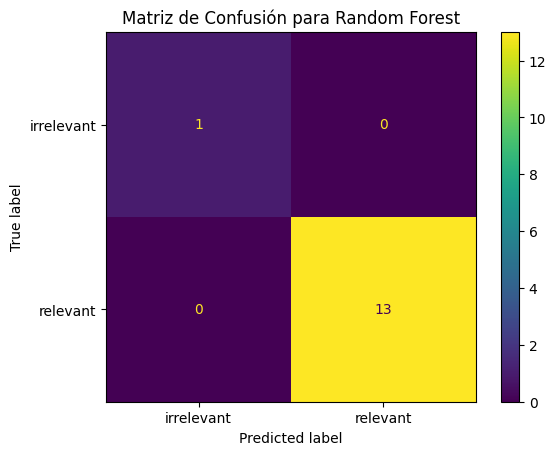

Reporte de Clasificaci√≥n de Random Forest:
              precision    recall  f1-score   support

 Irrelevante       1.00      1.00      1.00         1
   Relevante       1.00      1.00      1.00        13

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



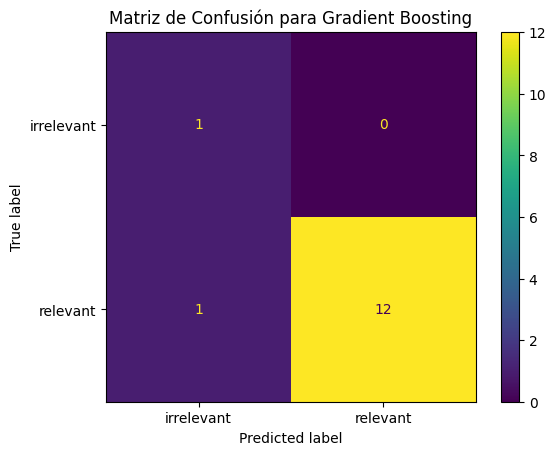

Reporte de Clasificaci√≥n de Gradient Boosting:
              precision    recall  f1-score   support

 Irrelevante       0.50      1.00      0.67         1
   Relevante       1.00      0.92      0.96        13

    accuracy                           0.93        14
   macro avg       0.75      0.96      0.81        14
weighted avg       0.96      0.93      0.94        14



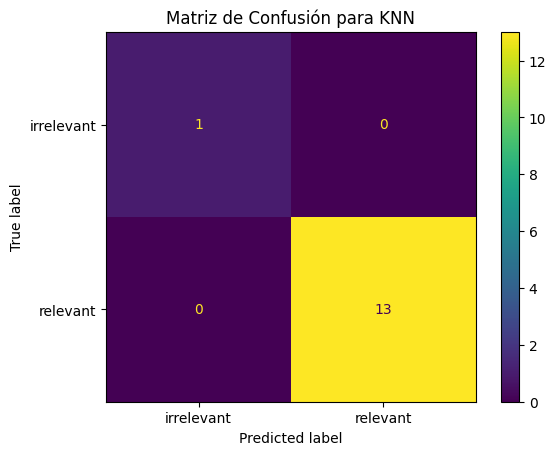

Reporte de Clasificaci√≥n de KNN:
              precision    recall  f1-score   support

 Irrelevante       1.00      1.00      1.00         1
   Relevante       1.00      1.00      1.00        13

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [ ]:
# Entrenar y evaluar cada modelo, almacenar los resultados en una lista
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Mostrar la matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='viridis')
    plt.title(f'Matriz de Confusi√≥n para {model_name}')
    plt.show()

    # Mostrar el informe de clasificaci√≥n
    report = classification_report(y_test, y_pred, target_names=['Irrelevante', 'Relevante'])
    print(f"Reporte de Clasificaci√≥n de {model_name}:\n{report}")

**Interpretaci√≥n de la evaluaci√≥n de Modelos de Machine Learning**


Se evaluaron varios modelos de machine learning en su capacidad para clasificar documentos como relevantes o irrelevantes utilizando las matrices de confusi√≥n y los reportes de clasificaci√≥n.

**Los modelos evaluados son: Regresi√≥n Log√≠stica, SVM, Random Forest, Gradient Boosting y KNN.**

**Resultados de los Modelos**






- **1. Regresi√≥n Log√≠stica**

  - **Matriz de Confusi√≥n:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **La Regresi√≥n Log√≠stica ha clasificado perfectamente todos los documentos sin cometer errores.**

- **2. SVM**

  - **Matriz de Confusi√≥n:**

   - Irrelevante: 0 verdaderos positivos (TP), 1 falso negativo (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 0.00 para Irrelevante, 0.93 para Relevante.

   - Recall: 0.00 para Irrelevante, 1.00 para Relevante.

   - F1-Score: 0.00 para Irrelevante, 0.96 para Relevante.

   - Exactitud (Accuracy): 0.93

 - **SVM no ha clasificado correctamente ning√∫n documento irrelevante, mostrando errores en esta clase.**

- **3. Random Forest**

  - **Matriz de Confusi√≥n:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **Random Forest ha clasificado perfectamente todos los documentos sin cometer errores.**

- **4. Gradient Boosting**

  - **Matriz de Confusi√≥n:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 12 verdaderos positivos (TP), 1 falso negativo (FN).

  - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 0.50 para Irrelevante, 1.00 para Relevante.

   - Recall: 1.00 para Irrelevante, 0.92 para Relevante.

   - F1-Score: 0.67 para Irrelevante, 0.96 para Relevante.

   - Exactitud (Accuracy): 0.93

 - **Gradient Boosting ha clasificado correctamente todos los documentos irrelevantes pero ha cometido errores con los documentos relevantes.**

- **5. KNN**

  - **Matriz de Confusi√≥n:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **KNN ha clasificado perfectamente todos los documentos sin cometer errores.**

In [ ]:
# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

In [ ]:
# Si deseas una visualizaci√≥n interactiva, puedes usar Jupyter Notebook y DataFrame de Pandas
results_df

Model  Accuracy  Precision    Recall  F1 Score
0  Regresi√≥n Log√≠stica  1.000000   1.000000  1.000000  1.000000
1                  SVM  0.928571   0.862245  0.928571  0.894180
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3    Gradient Boosting  0.928571   0.964286  0.928571  0.939048
4                  KNN  1.000000   1.000000  1.000000  1.000000

## **5.3. Optimizaci√≥n de los modelos**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir par√°metros para Grid Search
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

In [ ]:
# Grid Search para Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=100000), param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1 score:", grid_search_lr.best_score_)

In [ ]:
# Grid Search para Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1 score:", grid_search_rf.best_score_)

In [ ]:
from sklearn.model_selection import cross_val_score

# Validaci√≥n cruzada para Logistic Regression
scores_lr = cross_val_score(grid_search_lr.best_estimator_, X, y, cv=10, scoring='f1')
print("Cross-validation F1 scores for Logistic Regression:", scores_lr)
print("Mean F1 score:", scores_lr.mean())

# Validaci√≥n cruzada para Random Forest
scores_rf = cross_val_score(grid_search_rf.best_estimator_, X, y, cv=10, scoring='f1')
print("Cross-validation F1 scores for Random Forest:", scores_rf)
print("Mean F1 score:", scores_rf.mean())

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# Inicializar el tokenizer y el modelo de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Funci√≥n para obtener los embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
    outputs = bert_model(**inputs)
    # Obtener la √∫ltima capa oculta
    hidden_states = outputs.last_hidden_state
    # Promediar las representaciones de todos los tokens para obtener una √∫nica representaci√≥n del texto
    embeddings = torch.mean(hidden_states, dim=1)
    return embeddings.detach().numpy()

# Supongamos que el mejor modelo es el Random Forest con los mejores par√°metros encontrados
best_ml_model = grid_search_rf.best_estimator_

In [ ]:
# Supongamos que 'feature_names' es una lista de los nombres de las columnas usadas para entrenar el modelo
feature_names = X_train.columns.tolist()

# Funci√≥n para predecir la relevancia de un nuevo documento
def predict_relevance(new_text):
    new_embedding = get_bert_embeddings(new_text)
    new_embedding_df = pd.DataFrame(new_embedding, columns=feature_names)
    prediction = best_ml_model.predict(new_embedding_df)
    return prediction[0]

In [ ]:
# Ejemplo de uso
new_document = "En el laberinto de la modernidad financiera, Am√©rica Latina emerge como un escenario vibrante, donde la danza de la tecnolog√≠a financiera (FinTech) promete guiar a sus habitantes hacia un nuevo amanecer de inclusi√≥n y prosperidad."
print("Predicted relevance:", predict_relevance(new_document))

Predicted relevance: relevant


In [ ]:
# Ejemplo de uso
new_document = "El aprendizaje escolar se refiere al proceso de adquirir conocimientos, habilidades y competencias dentro de un entorno educativo formal, como una escuela, instituto o universidad. Es un componente esencial de la educaci√≥n formal y proporciona a los estudiantes las bases necesarias para su desarrollo acad√©mico y personal1. En este contexto, los alumnos interact√∫an con contenidos curriculares, profesores y compa√±eros, construyendo significados y comprendiendo conceptos clave. El aprendizaje escolar no solo implica la adquisici√≥n de informaci√≥n, sino tambi√©n la aplicaci√≥n activa de ese conocimiento en situaciones relevantes. As√≠, se busca que los estudiantes desarrollen habilidades cr√≠ticas, creativas y anal√≠ticas que les permitan enfrentar desaf√≠os tanto dentro como fuera del aula. Si tienes alguna pregunta espec√≠fica sobre el aprendizaje escolar, no dudes en preguntar"
print("Predicted relevance:", predict_relevance(new_document))

Predicted relevance: irrelevant


## **5.4. SMOTE: T√©cnica de balanceo de clases**

**SMOTE (Synthetic Minority Over-sampling Technique)** es una t√©cnica utilizada para abordar el problema del desbalanceo de clases en conjuntos de datos de clasificaci√≥n. Cuando una clase est√° significativamente subrepresentada en comparaci√≥n con otras clases, los modelos de aprendizaje autom√°tico tienden a estar sesgados hacia la clase mayoritaria. SMOTE genera ejemplos sint√©ticos de la clase minoritaria para equilibrar mejor las clases y mejorar el rendimiento del modelo en la clase minoritaria.

### **5.4.1. Implementaci√≥n de SMOTE**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Cargar el DataFrame etiquetado
df = pd.read_csv('/content/drive/MyDrive/papers_labeled.csv')

label
relevant      59
irrelevant    10
Name: count, dtype: int64


<ipython-input-74-2f158c126c7f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df, palette='viridis')


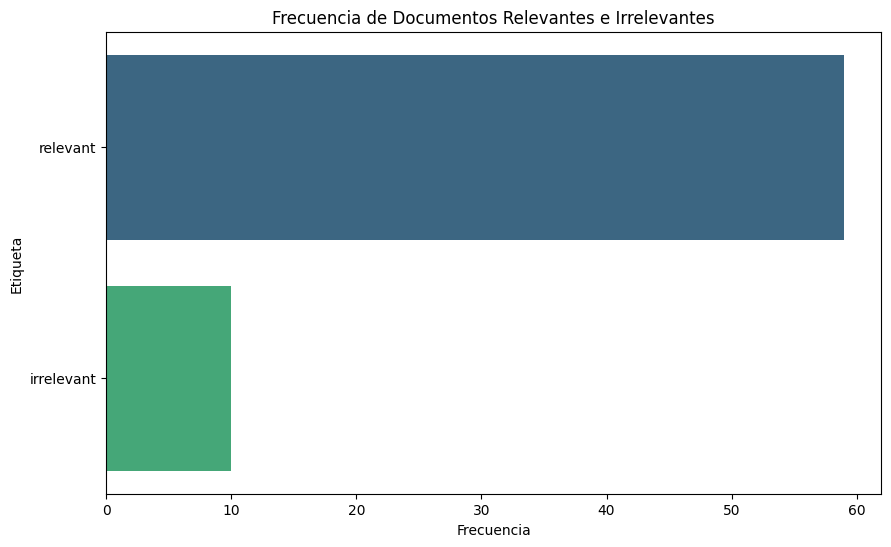

In [ ]:
# Contar las frecuencias de las etiquetas
label_counts = df['label'].value_counts()
print(label_counts)

# Visualizaci√≥n de la distribuci√≥n de etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df, palette='viridis')
plt.title('Frecuencia de Documentos Relevantes e Irrelevantes')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta')
plt.show()

Se visualiza que la **clase minoritaria** son los documentos **"Irrelevantes"**

Los datos se dividen en conjuntos de entrenamiento y prueba

In [ ]:
# Vectorizar el texto
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SMOTE se aplica al conjunto de entrenamiento usando `smote.fit_resample`, lo que genera nuevos ejemplos sint√©ticos para la clase minoritaria.

In [ ]:
# Aplicar SMOTE para corregir el desbalanceo
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Se imprime la distribuci√≥n de clases antes y despu√©s de aplicar SMOTE para verificar que las clases est√°n equilibradas.

In [ ]:
# Verificar el balance de clases despu√©s de aplicar SMOTE
print("Distribuci√≥n de clases antes de SMOTE:", Counter(y_train))
print("Distribuci√≥n de clases despu√©s de SMOTE:", Counter(y_train_smote))

Distribuci√≥n de clases antes de SMOTE: Counter({'relevant': 46, 'irrelevant': 9})
Distribuci√≥n de clases despu√©s de SMOTE: Counter({'irrelevant': 46, 'relevant': 46})


### **5.4.2. Resultados de los modelos**

Se reentrenan los modelos considerando los datos sint√©ticos creados mediante la t√©cnica SMOTE.

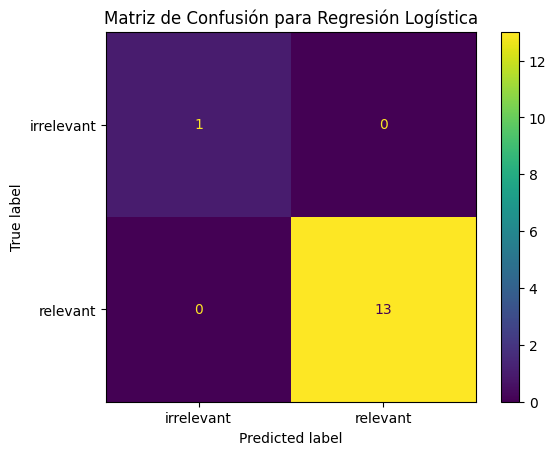

Reporte de Clasificaci√≥n de Regresi√≥n Log√≠stica:
              precision    recall  f1-score   support

 Irrelevante       1.00      1.00      1.00         1
   Relevante       1.00      1.00      1.00        13

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



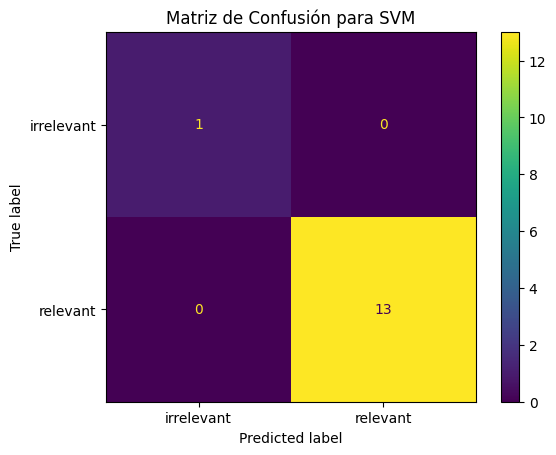

Reporte de Clasificaci√≥n de SVM:
              precision    recall  f1-score   support

 Irrelevante       1.00      1.00      1.00         1
   Relevante       1.00      1.00      1.00        13

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



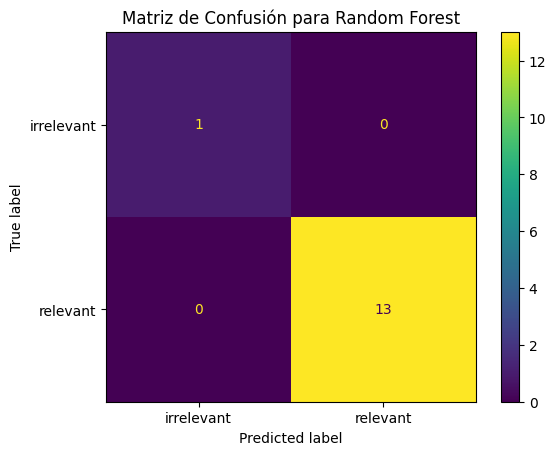

Reporte de Clasificaci√≥n de Random Forest:
              precision    recall  f1-score   support

 Irrelevante       1.00      1.00      1.00         1
   Relevante       1.00      1.00      1.00        13

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



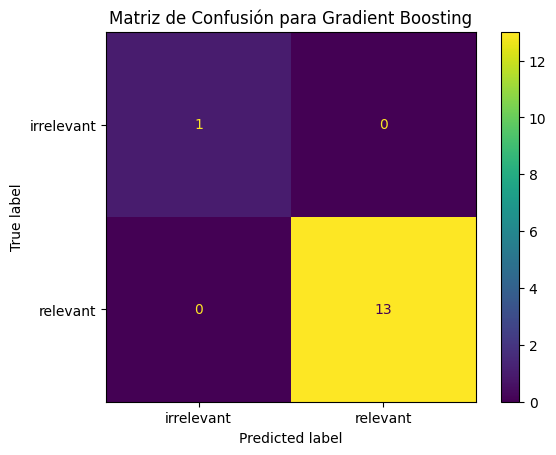

Reporte de Clasificaci√≥n de Gradient Boosting:
              precision    recall  f1-score   support

 Irrelevante       1.00      1.00      1.00         1
   Relevante       1.00      1.00      1.00        13

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



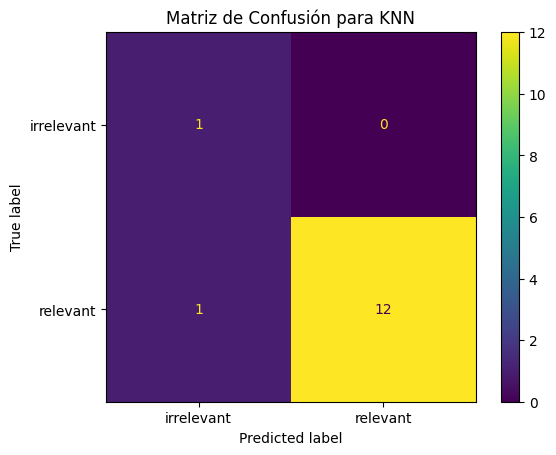

Reporte de Clasificaci√≥n de KNN:
              precision    recall  f1-score   support

 Irrelevante       0.50      1.00      0.67         1
   Relevante       1.00      0.92      0.96        13

    accuracy                           0.93        14
   macro avg       0.75      0.96      0.81        14
weighted avg       0.96      0.93      0.94        14



In [ ]:
# Definir los modelos
models = {
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=100000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

# Funci√≥n para evaluar el modelo
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Entrenar y evaluar cada modelo, almacenar los resultados en una lista
results = []
best_model = None
best_f1 = 0
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Guardar el mejor modelo basado en F1 Score
    if f1 > best_f1:
        best_f1 = f1
        best_model = model

    # Mostrar la matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='viridis')
    plt.title(f'Matriz de Confusi√≥n para {model_name}')
    plt.show()

    # Mostrar el informe de clasificaci√≥n
    report = classification_report(y_test, y_pred, target_names=['Irrelevante', 'Relevante'])
    print(f"Reporte de Clasificaci√≥n de {model_name}:\n{report}")

**Interpretaci√≥n de la evaluaci√≥n de Modelos de Machine Learning**

- **1. Regresi√≥n Log√≠stica**

  - **Matriz de Confusi√≥n:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **La Regresi√≥n Log√≠stica ha clasificado perfectamente todos los documentos sin cometer errores.**

- **2. SVM**

 - **Matriz de Confusi√≥n:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

 - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 1.00 para ambas clases.
   - Recall: 1.00 para ambas clases.
   - F1-Score: 1.00 para ambas clases.
   - Exactitud (Accuracy): 1.00.

 - **SVM ha clasificado perfectamente todos los documentos, mostrando una mejora significativa despu√©s de aplicar SMOTE.**

- **3. Random Forest**

  - **Matriz de Confusi√≥n:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 1.00 para ambas clases.
   - Recall: 1.00 para ambas clases.
   - F1-Score: 1.00 para ambas clases.
   - Exactitud (Accuracy): 1.00

  - **Random Forest ha clasificado perfectamente todos los documentos sin cometer errores.**


- **4. Gradient Boosting**

  - **Matriz de Confusi√≥n:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **Gradient Boosting ha clasificado perfectamente todos los documentos sin cometer errores, mejorando significativamente despu√©s de aplicar SMOTE.**

- **5. KNN**

 - **Matriz de Confusi√≥n:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 12 verdaderos positivos (TP), 1 falso negativo (FN).

 - **Reporte de Clasificaci√≥n:**

   - Precisi√≥n: 0.50 para Irrelevante, 1.00 para Relevante.

   - Recall: 1.00 para Irrelevante, 0.92 para Relevante.

   - F1-Score: 0.67 para Irrelevante, 0.96 para Relevante.

   - Exactitud (Accuracy): 0.93

 - **KNN ha mejorado en comparaci√≥n con los resultados anteriores, pero a√∫n muestra un error en la clasificaci√≥n de documentos relevantes.**

In [ ]:
# Mostrar los resultados
results_df = pd.DataFrame(results)
results_df

Model  Accuracy  Precision    Recall  F1 Score
0  Regresi√≥n Log√≠stica  1.000000   1.000000  1.000000  1.000000
1                  SVM  1.000000   1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3    Gradient Boosting  1.000000   1.000000  1.000000  1.000000
4                  KNN  0.928571   0.964286  0.928571  0.939048

Se visualiza una mejora de los modelos luego de aplicar la t√©cnica SMOTE, especialmente en el **modelo SVM** (comparar el resultado con los resultados del punto 5.2. Resultados de los modelos).

In [ ]:
# Funci√≥n para predecir la relevancia de un nuevo documento
def predict_relevance(new_text):
    new_embedding = vectorizer.transform([new_text])
    prediction = best_model.predict(new_embedding)
    return prediction[0]

## **5.5. Evaluaci√≥n con nuevos textos**

In [ ]:
# Ejemplo de uso
new_document = "En el laberinto de la modernidad financiera, Am√©rica Latina emerge como un escenario vibrante, donde la danza de la tecnolog√≠a financiera (FinTech) promete guiar a sus habitantes hacia un nuevo amanecer de inclusi√≥n y prosperidad."

print("Predicted relevance:", predict_relevance(new_document))

Predicted relevance: relevant


In [ ]:
# Ejemplo de uso
new_document = "El aprendizaje escolar se refiere al proceso de adquirir conocimientos, habilidades y competencias dentro de un entorno educativo formal, como una escuela, instituto o universidad. Es un componente esencial de la educaci√≥n formal y proporciona a los estudiantes las bases necesarias para su desarrollo acad√©mico y personal1. En este contexto, los alumnos interact√∫an con contenidos curriculares, profesores y compa√±eros, construyendo significados y comprendiendo conceptos clave. El aprendizaje escolar no solo implica la adquisici√≥n de informaci√≥n, sino tambi√©n la aplicaci√≥n activa de ese conocimiento en situaciones relevantes. As√≠, se busca que los estudiantes desarrollen habilidades cr√≠ticas, creativas y anal√≠ticas que les permitan enfrentar desaf√≠os tanto dentro como fuera del aula. Si tienes alguna pregunta espec√≠fica sobre el aprendizaje escolar, no dudes en preguntar"
print("Predicted relevance:", predict_relevance(new_document))

Predicted relevance: irrelevant


La t√©cnica SMOTE permite abordar el desbalanceo de clases en conjuntos de datos de clasificaci√≥n. Al generar ejemplos sint√©ticos de la clase minoritaria **(Irrelevantes)**, se mejora el rendimiento de los modelos de aprendizaje autom√°tico y ayuda a evitar el sesgo hacia la clase mayoritaria.

# **6. TOPIC MODELING CON LDA**

**LDA (Latent Dirichlet Allocation)** es un algoritmo popular para realizar topic modeling, una t√©cnica utilizada en procesamiento de lenguaje natural (NLP) y miner√≠a de textos para descubrir los temas subyacentes en un conjunto de documentos.

**Topic Modeling** es una t√©cnica de aprendizaje no supervisado que tiene como objetivo identificar patrones tem√°ticos en un corpus de textos. En lugar de etiquetar manualmente cada documento con temas espec√≠ficos, topic modeling autom√°ticamente organiza, comprende y etiqueta una colecci√≥n de documentos.

**LDA (Latent Dirichlet Allocation)** es un modelo generativo que asume que cada documento en el corpus es una mezcla de un peque√±o n√∫mero de temas y que cada tema es una mezcla de un peque√±o n√∫mero de palabras. LDA ayuda a identificar esos temas ocultos en el corpus.

**Conceptos Clave en LDA:**

- **Documentos y Corpus:** Un corpus es una colecci√≥n de documentos, donde cada documento es una colecci√≥n de palabras.

- **Temas (Topics):** Los temas son distribuciones probabil√≠sticas sobre un conjunto de palabras.

- **Palabras (Words):** Las palabras son las unidades b√°sicas que componen los documentos.




**¬øPara Qu√© Sirve LDA?**

- **Descubrimiento de Temas:** Identifica autom√°ticamente los temas m√°s importantes en un conjunto de documentos sin etiquetas.

- **An√°lisis de Texto:** Ayuda a comprender grandes vol√∫menes de texto, como art√≠culos de noticias, publicaciones en redes sociales, etc.

- **Organizaci√≥n de Informaci√≥n:** Organiza documentos en categor√≠as tem√°ticas para facilitar la b√∫squeda y recuperaci√≥n.

- **Resumen de Documentos:** Resumir documentos largos proporcionando una lista de temas relevantes.

- **Recomendaci√≥n de Contenidos:** En motores de recomendaci√≥n, puede ayudar a sugerir documentos o art√≠culos relacionados con intereses espec√≠ficos.

**Funcionamiento de LDA:**

- **Asignaci√≥n de Palabras a Temas:** LDA asume inicialmente que cada palabra en cada documento pertenece a un tema.

- **Ajuste Iterativo:** LDA ajusta iterativamente las asignaciones de palabras a temas para maximizar la probabilidad de observar las palabras en los documentos dados los temas.

- **Distribuciones de Palabras y Documentos:** LDA aprende dos distribuciones:

  - Distribuci√≥n de palabras para cada tema (es decir, qu√© palabras son m√°s probables en un tema).

  - Distribuci√≥n de temas para cada documento (es decir, qu√© temas son m√°s probables en un documento).

## **6.1. Pruebas iniciales**

### **6.1.1. Aplicaci√≥n de LDA**

In [ ]:
pip install gensim nltk

In [ ]:
pip install --upgrade smart_open

In [ ]:
# Instalar pyLDAvis si no est√° instalado
!pip install pyLDAvis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
from nltk.stem import WordNetLemmatizer
import pyLDAvis.gensim_models
import pyLDAvis
import matplotlib.pyplot as plt

In [ ]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
# Tokenizaci√≥n y eliminaci√≥n de stopwords
stop_words = list(set(stopwords.words('spanish')))  # Convertir el conjunto a lista
texts = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words]))

In [ ]:
# Crear el vectorizador y el corpus
vectorizer = CountVectorizer(max_features=10, lowercase=True, stop_words=stop_words)
X = vectorizer.fit_transform(texts)

# Entrenar el modelo LDA
lda_model = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(X)

# Mostrar los temas
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx}:")
    top_features_ind = topic.argsort()[:-5 - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    print(top_features)

In [ ]:
# Lista de stopwords en espa√±ol y adicionalmente en ingl√©s
stop_words_es = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))
stop_words = stop_words_es.union(stop_words_en).union(additional_stopwords_es)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

# Funci√≥n para preprocesar el texto
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Aplicar preprocesamiento
df['cleaned_text'] = df['text'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear diccionario y corpus
dictionary = corpora.Dictionary(df['cleaned_text'])
corpus = [dictionary.doc2bow(text) for text in df['cleaned_text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Entrenar el modelo LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **6.1.2. Visualizaci√≥n de 3 tem√°ticas de LDA**

In [ ]:
# Visualizar los temas
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Interpretaci√≥n del Gr√°fico:**

- **Mapa de Distancia Intert√≥pico:**

  - **T√≥picos 1 y 2:** En este gr√°fico, parece que los t√≥picos 1 y 2 est√°n bastante separados, lo que sugiere que son bastante distintos entre s√≠.

  - **Tama√±o del T√≥pico:** El t√≥pico 1 parece ser el m√°s grande, seguido por el t√≥pico 2, y luego el t√≥pico 3, en t√©rminos de prevalencia en el corpus.

- **T√©rminos M√°s Salientes:**

  - **T√©rminos del T√≥pico 0 (Seleccionado):** Palabras como "derecho", "innovation", "fintech", "modelos", "pymes", "venezuela", "innovaci√≥n" y "p√∫blica" son t√©rminos destacados.

  - **Frecuencia Total vs. Frecuencia Estimada del T√≥pico:** Las barras muestran la frecuencia general de los t√©rminos en azul y la frecuencia espec√≠fica del t√≥pico en rojo. Por ejemplo, "fintech" tiene una alta frecuencia tanto en general como dentro del t√≥pico seleccionado.

- **Distribuci√≥n Marginal del T√≥pico:**

  - **Distribuci√≥n del T√≥pico:** Los c√≠rculos conc√©ntricos muestran que el t√≥pico 1 es el m√°s prevalente en el corpus, seguido por los t√≥picos 2 y 3.

### **6.1.3. Coherencia inicial de temas de LDA**

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Calcular la coherencia de los temas
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['cleaned_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherencia de los temas: {coherence_lda}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherencia de los temas: 0.4717926711632405


## **6.2. Pruebas con mejoras**

**Mejoras que se aplicar√°n:**

 - **1. N√∫mero de Temas:** Se experiment√≥ con diferentes n√∫meros de temas (num_topics) para encontrar el balance √≥ptimo. Se realizaron  pruebas con m√°s o menos de 5 temas observando una mejor agrupaci√≥n.

 - **2. Preprocesamiento de Texto:** Se asegura de que el preprocesamiento del texto sea exhaustivo. Consideraciones:

  -  Remover palabras poco informativas adicionales que no fueron incluidas en la lista de stopwords.

  - Realizar una stemming (reducci√≥n de las palabras a su ra√≠z).

 - **3. Ajuste de Par√°metros del Modelo:**

  - **N√∫mero de Pasadas:** Se incrementa el n√∫mero de pasadas (passes) para mejorar la convergencia del modelo.

  - **Alpha y Beta:** Se ajusta los hiperpar√°metros alpha y beta para regularizar la distribuci√≥n de temas y palabras.

 - **4. Visualizaci√≥n Interactiva:** Se explora cada tema utilizando el control deslizante de relevancia (
ùúÜ
Œª) para obtener una mejor comprensi√≥n de los t√©rminos m√°s representativos.

- **5. Evaluaci√≥n de Coherencia:** Finalmente, se eval√∫a la coherencia de los temas utilizando m√©tricas como Coherencia de Palabras (C_v). Gensim proporciona funciones para evaluar la coherencia de los temas.

### **6.2.1. Visualizaci√≥n de 5 tem√°ticas de LDA**

In [ ]:
# Entrenar el modelo LDA con un n√∫mero diferente de temas
num_topics = 5  # Cambia el n√∫mero de temas para experimentar
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Visualizar los nuevos temas
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Interpretaci√≥n del Gr√°fico de LDA:**

El gr√°fico generado por pyLDAvis muestra los resultados del modelo Latent Dirichlet Allocation (LDA) en tu conjunto de textos.

- **Mapa de distancias entre temas (Intertopic Distance Map):**

  - **C√≠rculos:** Cada c√≠rculo representa un tema identificado por el modelo LDA.
  - **Tama√±o del c√≠rculo:** El tama√±o de cada c√≠rculo es proporcional a la prevalencia del tema en el corpus.
  - **Distancia entre c√≠rculos:** La distancia entre los c√≠rculos indica la similitud entre los temas. Temas m√°s cercanos son m√°s similares, mientras que temas m√°s alejados son m√°s distintos.

- **T√©rminos m√°s Relevantes del Tema Seleccionado:**

  - **Barra:** La barra muestra los t√©rminos m√°s relevantes para el tema seleccionado (en este caso, el Tema 2).

  - **Frecuencia:** Las barras rojas representan la frecuencia estimada del t√©rmino dentro del tema seleccionado, y las barras azules representan la frecuencia general del t√©rmino en el corpus.

  - **Relevancia (
ùúÜ
Œª):** El control deslizante de relevancia ajusta el balance entre la frecuencia del t√©rmino y su especificidad para el tema. Un
ùúÜ
Œª m√°s alto favorece t√©rminos espec√≠ficos para el tema, mientras que un
ùúÜ
Œª m√°s bajo favorece t√©rminos frecuentes.

**Interpretaci√≥n Espec√≠fica del Gr√°fico:**

- **1. Tema 2:**

  - **Palabras clave:** Las palabras clave m√°s relevantes incluyen "derecho", "innovaci√≥n", "administraci√≥n", "art√≠culo", "p√∫blica", "ley", entre otras.

  - **Interpretaci√≥n:** El Tema 2 parece estar relacionado con temas legales y de administraci√≥n p√∫blica. Palabras como "ley", "derecho" y "p√∫blica" sugieren un enfoque en aspectos legales y administrativos de las fintech o √°reas relacionadas.

- **2. Otros temas:**

  - **Tema 1, 3, 4 y 5:** Los otros c√≠rculos representan otros temas. El an√°lisis de los t√©rminos m√°s relevantes para cada uno de estos temas ayudar√° a identificar el enfoque de cada tema.



### **6.2.2. Coherencia mejorada de temas de LDA**

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Calcular la coherencia de los temas
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['cleaned_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherencia de los temas: {coherence_lda}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherencia de los temas: 0.6068456598740498


# **7. CONCLUSIONES**

En este trabajo se ha demostrado la efectividad de aplicar t√©cnicas avanzadas de procesamiento de lenguaje natural (NLP) y m√©todos de clasificaci√≥n para identificar y categorizar documentos relevantes en el √°mbito acad√©mico o de investigaci√≥n, m√°s precisamente en relaci√≥n con la tem√°tica Fintech. A lo largo del proyecto, se realizaron diversas etapas que permitieron alcanzar los objetivos planteados de manera exitosa.

El **preprocesamiento de texto** fue un paso crucial en el cual se aplicaron t√©cnicas de limpieza, normalizaci√≥n, tokenizaci√≥n y lematizaci√≥n. Estos procesos fueron fundamentales para eliminar el ruido y asegurar que los datos estuvieran en un formato adecuado para el an√°lisis posterior. La eliminaci√≥n de stopwords y la conversi√≥n de las palabras a su forma base permitieron una representaci√≥n m√°s coherente y uniforme de los textos.

Posteriormente, se emple√≥ el **algoritmo K-Means** para realizar un clustering de los textos. Esta t√©cnica permiti√≥ agrupar los documentos en clusters, identificando patrones y similitudes entre ellos. La visualizaci√≥n de los clusters mediante PCA revel√≥ una separaci√≥n clara entre los diferentes grupos, facilitando una mejor comprensi√≥n de la estructura y variabilidad de los textos en el corpus.

La **implementaci√≥n de BERT** para la obtenci√≥n de embeddings de alta calidad represent√≥ un avance significativo en la representaci√≥n de los textos. BERT captur√≥ el contexto y el significado de las palabras, proporcionando una base s√≥lida para el an√°lisis y la clasificaci√≥n. Estos embeddings mejoraron la precisi√≥n y eficiencia de los modelos predictivos aplicados posteriormente.

En la etapa de **entrenamiento de modelos predictivos**, se evaluaron varios algoritmos de clasificaci√≥n, incluyendo **Regresi√≥n Log√≠stica, SVM, Random Forest, Gradient Boosting y KNN**. Los resultados mostraron que algunos modelos, como Regresi√≥n Log√≠stica y Random Forest, lograron una clasificaci√≥n perfecta, mientras que otros, como SVM y Gradient Boosting, mejoraron significativamente tras aplicar **t√©cnicas de balanceo de clases como SMOTE**. La **evaluaci√≥n mediante m√©tricas de precisi√≥n, recall y F1 score, junto con las matrices de confusi√≥n**, permiti√≥ identificar patrones de errores y ajustar los modelos para obtener un rendimiento √≥ptimo. Aunque los modelos desarrollados han mostrado resultados prometedores, su desempe√±o puede mejorar con una mayor cantidad de documentos, dado que lo utilizado en este trabajo fue a modo ejemplificativo.

Adem√°s, el c√≥digo implementado en Python puede utilizarse para datos de textos que se obtengan de otras fuentes, como scraping de web, APIs o cualquier otra fuente que se considere necesaria. Esto ampl√≠a las posibilidades de aplicaci√≥n de las t√©cnicas desarrolladas en este proyecto, permitiendo un an√°lisis m√°s amplio y diverso de diferentes tipos de documentos.







Para concluir, se aplic√≥ la **t√©cnica de LDA** para el modelado de t√≥picos, lo cual ayud√≥ a identificar temas subyacentes en el corpus. Este an√°lisis tem√°tico permiti√≥ organizar los documentos de manera m√°s coherente y descubrir patrones importantes en los datos.


# **8. LINK DEL CONJUNTO DE DATOS DE TEXTOS**

In [ ]:
# Conexi√≥n con Drive
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


**Datos originales (sin preprocesamiento ni etiquetas)**

In [ ]:
# Copiar el ID del archivo guardado en Drive y que se encuentra entre "//""
# Nombre del archivo: corpus_original.csv

!gdown --id 1Ccw9wc5m_qp6qkuwvmVyz_ZoeH2KfTDc

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ccw9wc5m_qp6qkuwvmVyz_ZoeH2KfTDc
To: /content/corpus_original.csv
100% 7.81M/7.81M [00:00<00:00, 125MB/s]


**Datos Etiquetados (sin preprocesamiento)**

In [ ]:
# Copiar el ID del archivo guardado en Drive y que se encuentra entre "//""
# Nombre del archivo: papers_lebeled.csv

!gdown --id 1qwgx1rsvUgDi8c6B2zIuMdr7Rwr84VuX

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qwgx1rsvUgDi8c6B2zIuMdr7Rwr84VuX
To: /content/papers_labeled.csv
100% 7.74M/7.74M [00:00<00:00, 39.7MB/s]


**Datos con preprocesamiento**

In [ ]:
# Copiar el ID del archivo guardado en Drive y que se encuentra entre "//""
# Nombre del archivo: papers_preprocessed.csv

!gdown --id 1bKQQulNJuToMxXikCaJPmm8xF0sd2Lrn

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bKQQulNJuToMxXikCaJPmm8xF0sd2Lrn
To: /content/papers_preprocessed.csv
100% 27.0M/27.0M [00:01<00:00, 19.1MB/s]


**Datos con aplicaci√≥n de BERT**

In [ ]:
# Copiar el ID del archivo guardado en Drive y que se encuentra entre "//""
# Nombre del archivo: papers_bert_embeddings.csv

!gdown --id 1OlemHyMN13k7nx23aPUroiwnrNmihiOT

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OlemHyMN13k7nx23aPUroiwnrNmihiOT
To: /content/papers_bert_embeddings.csv
100% 612k/612k [00:00<00:00, 45.6MB/s]
